## Adult Dataset

In [ ]:
import pandas as pd
import numpy as np

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

train_data = pd.read_csv("adult.data", header=None, names=columns, na_values=" ?", skipinitialspace=True)
test_data = pd.read_csv("adult.test", header=None, names=columns, na_values=" ?", skipinitialspace=True, skiprows=1)
adult = pd.concat([train_data, test_data], ignore_index=True)

adult.dropna(axis=0, inplace=True)

adult['income'] = adult['income'].str.strip().replace({'>50K.': -1, '<=50K.': 1, '>50K': -1, '<=50K': 1})

couple_status = ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
single_status = ["Never-married", "Divorced", "Separated", "Widowed"]
adult['marital-status'] = adult['marital-status'].apply(lambda x: 1 if x in couple_status else -1)

# One-hot encode categorical columns (excluding 'native-country')
categorical_columns = ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex']
adult = pd.get_dummies(adult, columns=categorical_columns, prefix_sep='_', drop_first=True)

# Group 'native-country' into regions and one-hot encode
def map_country_to_region(country):
    region_mapping = {
        "United-States": "North_America", "Canada": "North_America", "Mexico": "North_America",
        "Puerto-Rico": "North_America", "Outlying-US(Guam-USVI-etc)": "North_America",
        "Cuba": "Central_South_America", "Jamaica": "Central_South_America",
        "Honduras": "Central_South_America", "Columbia": "Central_South_America",
        "Ecuador": "Central_South_America", "Dominican-Republic": "Central_South_America",
        "El-Salvador": "Central_South_America", "Guatemala": "Central_South_America",
        "Trinadad&Tobago": "Central_South_America", "Nicaragua": "Central_South_America",
        "Peru": "Central_South_America", "England": "Europe", "Germany": "Europe",
        "Italy": "Europe", "Poland": "Europe", "Portugal": "Europe", "France": "Europe",
        "Scotland": "Europe", "Greece": "Europe", "Ireland": "Europe", "Hungary": "Europe",
        "Holand-Netherlands": "Europe", "Yugoslavia": "Europe", "India": "Asia",
        "Iran": "Asia", "Philippines": "Asia", "Cambodia": "Asia", "Thailand": "Asia",
        "Laos": "Asia", "Taiwan": "Asia", "China": "Asia", "Japan": "Asia", "Vietnam": "Asia",
        "Hong": "Asia", "?": "Unknown", "South": "Unknown"
    }
    return region_mapping.get(country, "Other")

adult['native-country'] = adult['native-country'].apply(map_country_to_region)
adult = pd.get_dummies(adult, columns=['native-country'], drop_first=True)

binary_columns = adult.select_dtypes(include=['int64', 'uint8']).columns
for col in binary_columns:
    if adult[col].nunique() == 2: 
        adult[col] = adult[col].apply(lambda x: 1 if x == 1 else -1)

for column in adult.columns:
    if adult[column].dtype == bool:  
        adult[column] = adult[column].replace({True: 1, False: -1})  
    elif adult[column].dtype == int and adult[column].nunique() == 2:  
        adult[column] = adult[column].replace({1: 1, 0: -1})  
adult


/var/folders/7x/jtprqt351tn3_hbj751vpskc0000gn/T/ipykernel_20118/3606740371.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult['income'] = adult['income'].str.strip().replace({'>50K.': -1, '<=50K.': 1, '>50K': -1, '<=50K': 1})
/var/folders/7x/jtprqt351tn3_hbj751vpskc0000gn/T/ipykernel_20118/3606740371.py:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult[column] = adult[column].replace({True: 1, False: -1})  # Replace True with 1 and False with -1


age  fnlwgt  education-num  marital-status  capital-gain  capital-loss  \
0       39   77516             13              -1          2174             0   
1       50   83311             13               1             0             0   
2       38  215646              9              -1             0             0   
3       53  234721              7               1             0             0   
4       28  338409             13               1             0             0   
...    ...     ...            ...             ...           ...           ...   
48837   39  215419             13              -1             0             0   
48838   64  321403              9              -1             0             0   
48839   38  374983             13               1             0             0   
48840   44   83891             13              -1          5455             0   
48841   35  182148             13               1             0             0   

       hours-per-week  income  workclass_Federal-gov  workclass_Local-gov  \
0                  40       1                     -1                   -1   
1                  13       1                     -1                   -1   
2                  40       1                     -1                   -1   
3                  40       1                     -1                   -1   
4                  40       1                     -1                   -1   
...               ...     ...                    ...                  ...   
48837              36       1                     -1                   -1   
48838              40       1                     -1                   -1   
48839              50       1                     -1                   -1   
48840              40       1                     -1                   -1   
48841              60      -1                     -1                   -1   

       ...  race_Asian-Pac-Islander  race_Black  race_Other  race_White  \
0      ...                       -1          -1          -1           1   
1      ...                       -1          -1          -1           1   
2      ...                       -1          -1          -1           1   
3      ...                       -1           1          -1          -1   
4      ...                       -1           1          -1          -1   
...    ...                      ...         ...         ...         ...   
48837  ...                       -1          -1          -1           1   
48838  ...                       -1           1          -1          -1   
48839  ...                       -1          -1          -1           1   
48840  ...                        1          -1          -1          -1   
48841  ...                       -1          -1          -1           1   

       sex_Male  native-country_Central_South_America  native-country_Europe  \
0             1                                    -1                     -1   
1             1                                    -1                     -1   
2             1                                    -1                     -1   
3             1                                    -1                     -1   
4            -1                                     1                     -1   
...         ...                                   ...                    ...   
48837        -1                                    -1                     -1   
48838         1                                    -1                     -1   
48839         1                                    -1                     -1   
48840         1                                    -1                     -1   
48841         1                                    -1                     -1   

       native-country_North_America  native-country_Other  \
0                                 1                    -1   
1                                 1                    -1   
2                                 1                    -1   
3  

In [88]:
#ensure no null values
print(adult.isna().sum())

age                                     0
fnlwgt                                  0
education-num                           0
marital-status                          0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
income                                  0
workclass_Federal-gov                   0
workclass_Local-gov                     0
workclass_Never-worked                  0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
workclass_Without-pay                   0
education_11th                          0
education_12th                          0
education_1st-4th                       0
education_5th-6th                       0
education_7th-8th                       0
education_9th                           0
education_Assoc-acdm                    0
education_Assoc-voc               

Since the values in the numerical columns have significantly different ranges, it might be beneficial to standardise them, ensuring that the features are on the same scale and contribute equally to the model.

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
adult[numerical_cols] = scaler.fit_transform(adult[numerical_cols])

adult

age    fnlwgt  education-num  marital-status  capital-gain  \
0      0.025996 -1.061979       1.136512              -1      0.146932   
1      0.828308 -1.007104       1.136512               1     -0.144804   
2     -0.046942  0.246034      -0.419335              -1     -0.144804   
3      1.047121  0.426663      -1.197259               1     -0.144804   
4     -0.776316  1.408530       1.136512               1     -0.144804   
...         ...       ...            ...             ...           ...   
48837  0.025996  0.243884       1.136512              -1     -0.144804   
48838  1.849433  1.247492      -0.419335              -1     -0.144804   
48839 -0.046942  1.754865       1.136512               1     -0.144804   
48840  0.390683 -1.001612       1.136512              -1      0.587220   
48841 -0.265754 -0.071174       1.136512               1     -0.144804   

       capital-loss  hours-per-week  income  workclass_Federal-gov  \
0         -0.217127       -0.034087       1                     -1   
1         -0.217127       -2.213032       1                     -1   
2         -0.217127       -0.034087       1                     -1   
3         -0.217127       -0.034087       1                     -1   
4         -0.217127       -0.034087       1                     -1   
...             ...             ...     ...                    ...   
48837     -0.217127       -0.356894       1                     -1   
48838     -0.217127       -0.034087       1                     -1   
48839     -0.217127        0.772930       1                     -1   
48840     -0.217127       -0.034087       1                     -1   
48841     -0.217127        1.579946      -1                     -1   

       workclass_Local-gov  ...  race_Asian-Pac-Islander  race_Black  \
0                       -1  ...                       -1          -1   
1                       -1  ...                       -1          -1   
2                       -1  ...                       -1          -1   
3                       -1  ...                       -1           1   
4                       -1  ...                       -1           1   
...                    ...  ...                      ...         ...   
48837                   -1  ...                       -1          -1   
48838                   -1  ...                       -1           1   
48839                   -1  ...                       -1          -1   
48840                   -1  ...                        1          -1   
48841                   -1  ...                       -1          -1   

       race_Other  race_White  sex_Male  native-country_Central_South_America  \
0              -1           1         1                                    -1   
1              -1           1         1                                    -1   
2              -1           1         1                                    -1   
3              -1          -1         1                                    -1   
4              -1          -1        -1                                     1   
...           ...         ...       ...                                   ...   
48837          -1           1        -1                                    -1   
48838          -1          -1         1                                    -1   
48839          -1           1         1                                    -1   
48840          -1          -1         1                                    -1   
48841          -1           1         1                                    -1   

       native-country_Europe  native-country_North_America  \
0                         -1                             1   
1                         -1                             1   
2                         -1                             1   
3                         -1                             1   
4                         -1                            -1   
...                      ...                           ...   
48837     

In [90]:
X_adult = adult.drop('income', axis=1)  # Features
y_adult = adult['income']  # Target

## Mushroom Dataset

In [ ]:
#primary_data = pd.read_csv('primary_data.csv', delimiter=';')

#for the purpose of this classification task, using the seconday data is sufficient 
# because we do not need descriptors such as name and family, secondary dataset has all the informaiton we need
mushroom_data = pd.read_csv('secondary_data.csv', delimiter=';')

#drop the columns with missing values
mushroom_data = mushroom_data.dropna(axis=1)

mushroom_data

# Map 'p' (poisonous) to 1 and 'e' (edible) to -1
mushroom_data['class'] = mushroom_data['class'].map({'p': 1, 'e': -1})

print(mushroom_data.columns)

columns_to_encode = ['cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'habitat', 'season']


mushroom_data_encoded = pd.get_dummies(mushroom_data[columns_to_encode], drop_first=False)


mushroom_data_encoded = pd.concat([mushroom_data.drop(columns=columns_to_encode), mushroom_data_encoded], axis=1)

encoded_columns = mushroom_data_encoded.columns.difference(['class'])  # Exclude 'class' column
mushroom_data_encoded[encoded_columns] = mushroom_data_encoded[encoded_columns].replace({True: 1, False: -1})

mushroom_data = mushroom_data_encoded

mushroom_data

numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']  


scaler = StandardScaler()
mushroom_data[numerical_columns] = scaler.fit_transform(mushroom_data[numerical_columns])

mushroom_data

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'habitat', 'season'],
      dtype='object')


/var/folders/7x/jtprqt351tn3_hbj751vpskc0000gn/T/ipykernel_20118/4233719515.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mushroom_data_encoded[encoded_columns] = mushroom_data_encoded[encoded_columns].replace({True: 1, False: -1})


class  cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
0          1      1.619462     3.076705    0.492293           -1           -1   
1          1      1.873982     3.385311    0.601900           -1           -1   
2          1      1.393432     3.328931    0.557061           -1           -1   
3          1      1.412426     2.726555    0.381690           -1           -1   
4          1      1.501699     2.952075    0.503254           -1           -1   
...      ...           ...          ...         ...          ...          ...   
61064      1     -1.054903    -0.786809   -0.590822           -1           -1   
61065      1     -1.037808    -1.009362   -0.669539           -1           -1   
61066      1     -1.037808    -0.807581   -0.575875           -1           -1   
61067      1     -1.043506    -0.896602   -0.668543           -1           -1   
61068      1     -1.056802    -0.988590   -0.667546           -1           -1   

       cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  ...  habitat_h  \
0               -1           -1           -1           -1  ...         -1   
1               -1           -1           -1           -1  ...         -1   
2               -1           -1           -1           -1  ...         -1   
3                1           -1           -1           -1  ...         -1   
4               -1           -1           -1           -1  ...         -1   
...            ...          ...          ...          ...  ...        ...   
61064           -1           -1           -1            1  ...         -1   
61065            1           -1           -1           -1  ...         -1   
61066           -1           -1           -1            1  ...         -1   
61067            1           -1           -1           -1  ...         -1   
61068           -1           -1           -1            1  ...         -1   

       habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  season_a  \
0             -1         -1         -1         -1         -1        -1   
1             -1         -1         -1         -1         -1        -1   
2             -1         -1         -1         -1         -1        -1   
3             -1         -1         -1         -1         -1        -1   
4             -1         -1         -1         -1         -1        -1   
...          ...        ...        ...        ...        ...       ...   
61064         -1         -1         -1         -1         -1         1   
61065         -1         -1         -1         -1         -1         1   
61066         -1         -1         -1         -1         -1        -1   
61067         -1         -1         -1         -1         -1        -1   
61068         -1         -1         -1         -1         -1        -1   

       season_s  season_u  season_w  
0            -1        -1         1  
1            -1         1        -1  
2            -1        -1         1  
3            -1        -1         1  
4            -1        -1         1  
...         ...       ...       ...  
61064        -1        -1        -1  
61065        -1        -1        -1  
61066        -1         1        -1  
61067        -1         1        -1  
61068        -1         1        -1  

[61069 rows x 64 columns]

In [62]:
X_mushroom = mushroom_data.drop(columns=['class']) 
y_mushroom = mushroom_data['class']  

## Bank Term Deposit Subscription Dataset

In [ ]:
bank_full = pd.read_csv('bank-full.csv', sep=';')
bank_additional = pd.read_csv('bank-additional-full.csv', sep=';')

bank_additional


common_columns = list(set(bank_full.columns) & set(bank_additional.columns))


bank_full_aligned = bank_full[common_columns]
bank_additional_aligned = bank_additional[common_columns]


bank_combined = pd.concat([bank_full_aligned, bank_additional_aligned], axis=0, ignore_index=True)

#ensure no missing data
print(bank_combined.isnull().sum())

bank_combined['loan'] = bank_combined['loan'].map({'yes': 1, 'no': -1})

bank_combined

bank_combined = pd.get_dummies(bank_combined, columns=['marital', 'job', 'month', 'contact', 'poutcome', 'education'])

bank_combined = bank_combined.replace({True: 1, False: -1})
bank_combined = bank_combined.replace({'yes': 1, 'no': -1})


bank_combined = bank_combined.drop(columns=['y'])

bank_combined = bank_combined.dropna(subset=['loan'])

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
columns_to_scale = ['age', 'pdays', 'duration']


bank_combined[columns_to_scale] = scaler.fit_transform(bank_combined[columns_to_scale])

bank_combined = bank_combined[~bank_combined.isin(['unknown']).any(axis=1)]

bank_combined

y            0
marital      0
loan         0
age          0
pdays        0
default      0
month        0
job          0
duration     0
campaign     0
previous     0
housing      0
education    0
poutcome     0
contact      0
dtype: int64


/var/folders/7x/jtprqt351tn3_hbj751vpskc0000gn/T/ipykernel_20118/327015103.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_combined = bank_combined.replace({True: 1, False: -1})
/var/folders/7x/jtprqt351tn3_hbj751vpskc0000gn/T/ipykernel_20118/327015103.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_combined = bank_combined.replace({'yes': 1, 'no': -1})


loan       age     pdays default  duration  campaign  previous housing  \
0      -1.0  1.660165 -0.983149      -1  0.010394         1         0       1   
1      -1.0  0.331445 -0.983149      -1 -0.415300         1         0       1   
2       1.0 -0.712550 -0.983149      -1 -0.705546         1         0       1   
3      -1.0  0.616171 -0.983149      -1 -0.643627         1         0       1   
4      -1.0 -0.712550 -0.983149      -1 -0.233413         1         0      -1   
...     ...       ...       ...     ...       ...       ...       ...     ...   
86394  -1.0  3.083794  1.085582      -1  0.292900         1         0       1   
86395  -1.0  0.521262  1.085582      -1  0.482527         1         0      -1   
86396  -1.0  1.470348  1.085582      -1 -0.268242         2         0       1   
86397  -1.0  0.331445  1.085582      -1  0.710854         1         0      -1   
86398  -1.0  3.178703  1.085582      -1 -0.074745         3         1       1   

       marital_divorced  marital_married  ...  education_basic.6y  \
0                    -1                1  ...                  -1   
1                    -1               -1  ...                  -1   
2                    -1                1  ...                  -1   
3                    -1                1  ...                  -1   
4                    -1               -1  ...                  -1   
...                 ...              ...  ...                 ...   
86394                -1                1  ...                  -1   
86395                -1                1  ...                  -1   
86396                -1                1  ...                  -1   
86397                -1                1  ...                  -1   
86398                -1                1  ...                  -1   

       education_basic.9y  education_high.school  education_illiterate  \
0                      -1                     -1                    -1   
1                      -1                     -1                    -1   
2                      -1                     -1                    -1   
3                      -1                     -1                    -1   
4                      -1                     -1                    -1   
...                   ...                    ...                   ...   
86394                  -1                     -1                    -1   
86395                  -1                     -1                    -1   
86396                  -1                     -1                    -1   
86397                  -1                     -1                    -1   
86398                  -1                     -1                    -1   

       education_primary  education_professional.course  education_secondary  \
0                     -1                             -1                   -1   
1                     -1                             -1                    1   
2                     -1                             -1                    1   
3                     -1                             -1                   -1   
4                     -1                             -1                   -1   
...                  ...                            ...                  ...   
86394                 -1                              1                   -1   
86395                 -1                              1                   -1   
86396                 -1                             -1                   -1   
86397                 -1                              1                   -1   
86398                 -1                              1                   -1   

       education_tertiary  education_university.degree  education_unknown  
0                       1                           -1                 -1  
1                      -1                           -1                 -1  
2                      -1                           -1                 -1  
3                      -1                          

In [ ]:
# Take a random sample of 10,000 instances from bank_combined
bank_combined = bank_combined.sample(n=10000, random_state=42)

bank_combined

print(bank_combined['loan'].value_counts())



loan
-1.0    8446
 1.0    1554
Name: count, dtype: int64


In [ ]:
X_bank = bank_combined.drop(columns=['loan'])  # Features 
y_bank = bank_combined['loan']  # Target (the 'loan' column)

## Testing the classifiers on these datasets

Adult dataset testing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


for trial in range(3):  
    print(f"\nTrial {trial + 1}")


    X, y = shuffle(X_adult, y_adult, random_state=trial)


    partitions = [0.2, 0.5, 0.8]


    for i in range(3): 
        partition_size = partitions[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=partition_size, random_state=42)


        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        print(f"  Partition {100 - (partition_size * 100)} / {partition_size * 100}:")

       
        for model_index in range(3):
            if model_index == 0:  # Support Vector Machine
                classifier_svm = SVC(kernel='linear')
                C_list = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
                grid_svm = GridSearchCV(classifier_svm, {'C': C_list}, scoring='accuracy', cv=10)
                grid_svm.fit(X_train, y_train)

                best_svm = grid_svm.best_estimator_

                # Cross-validation score for SVM
                cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=10, scoring='accuracy')
                print(f"    SVM Cross-validation Accuracy (mean): {cv_scores_svm.mean():.4f}")

                pred_svm = best_svm.predict(X_test)
                print(f"    Support Vector Machine:\n{classification_report(y_test, pred_svm)}")

            elif model_index == 1:  # Random Forest
                classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
                max_depth_list = [1, 2, 3, 4, 5]
                grid_rf = GridSearchCV(classifier_rf, {'max_depth': max_depth_list}, scoring='accuracy', cv=10)
                grid_rf.fit(X_train, y_train)

                best_rf = grid_rf.best_estimator_

                # Cross-validation score for Random Forest
                cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='accuracy')
                print(f"    Random Forest Cross-validation Accuracy (mean): {cv_scores_rf.mean():.4f}")

                pred_rf = best_rf.predict(X_test)
                print(f"    Random Forest:\n{classification_report(y_test, pred_rf)}")

            elif model_index == 2:  # AdaBoost
                classifier_ab = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
                learning_rate_list = [0.01, 0.1, 1, 10]
                grid_ab = GridSearchCV(classifier_ab, {'learning_rate': learning_rate_list}, scoring='accuracy', cv=10)
                grid_ab.fit(X_train, y_train)

                best_ab = grid_ab.best_estimator_

                # Cross-validation score for AdaBoost
                cv_scores_ab = cross_val_score(best_ab, X_train, y_train, cv=10, scoring='accuracy')
                print(f"    AdaBoost Cross-validation Accuracy (mean): {cv_scores_ab.mean():.4f}")

                pred_ab = best_ab.predict(X_test)
                print(f"    AdaBoost:\n{classification_report(y_test, pred_ab)}")



Trial 1
  Partition 80.0 / 20.0:
    SVM Cross-validation Accuracy (mean): 0.8516
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.74      0.59      0.65      2353
           1       0.88      0.94      0.90      7416

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

    Random Forest Cross-validation Accuracy (mean): 0.8413
    Random Forest:
              precision    recall  f1-score   support

          -1       0.84      0.40      0.54      2353
           1       0.84      0.98      0.90      7416

    accuracy                           0.84      9769
   macro avg       0.84      0.69      0.72      9769
weighted avg       0.84      0.84      0.82      9769

    AdaBoost Cross-validation Accuracy (mean): 0.8561
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.75      0.58 


Trial 1
  Partition 80.0 / 20.0:


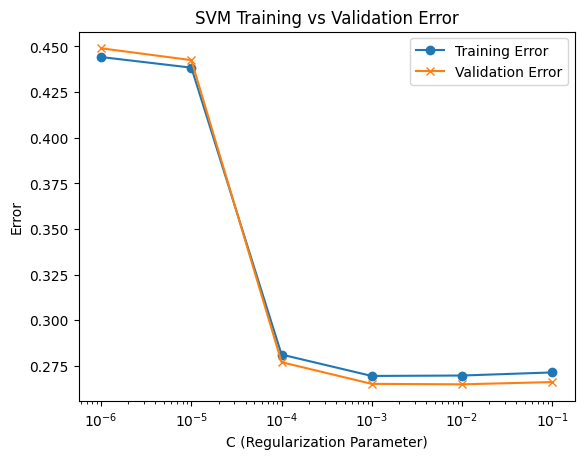

    Best SVM Hyperparameter (C): 0.01
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.71      0.70      0.70      5483
           1       0.76      0.76      0.76      6731

    accuracy                           0.74     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.74      0.74      0.74     12214



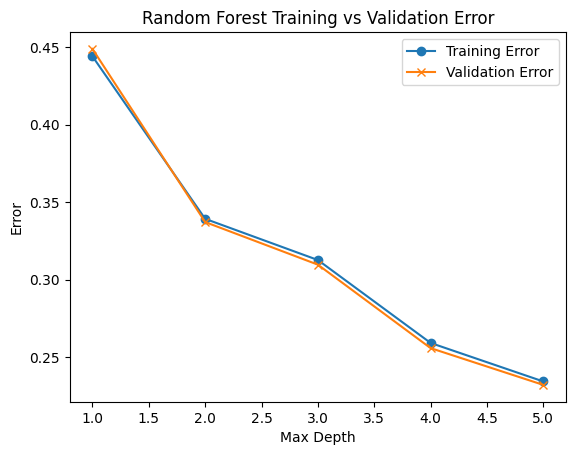

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.81      0.63      0.71      5483
           1       0.75      0.88      0.81      6731

    accuracy                           0.77     12214
   macro avg       0.78      0.76      0.76     12214
weighted avg       0.77      0.77      0.76     12214



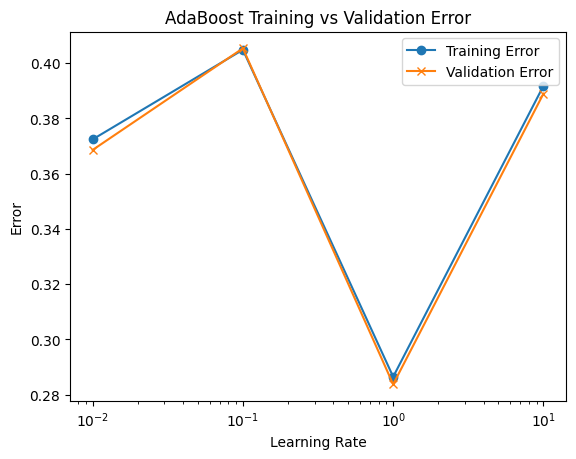

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.70      0.64      0.67      5483
           1       0.73      0.78      0.75      6731

    accuracy                           0.72     12214
   macro avg       0.71      0.71      0.71     12214
weighted avg       0.72      0.72      0.71     12214

  Partition 50.0 / 50.0:


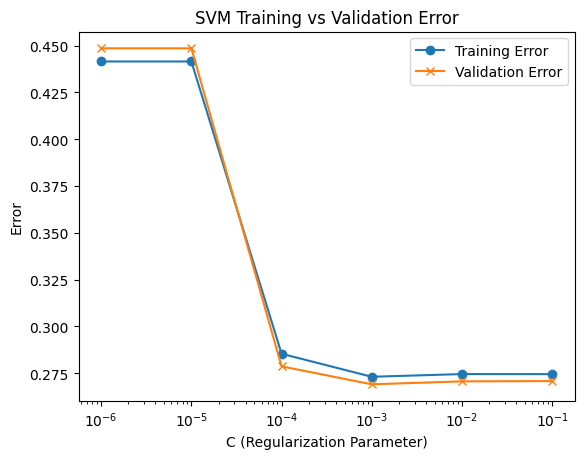

    Best SVM Hyperparameter (C): 0.001
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.71      0.67      0.69     13698
           1       0.74      0.78      0.76     16837

    accuracy                           0.73     30535
   macro avg       0.73      0.73      0.73     30535
weighted avg       0.73      0.73      0.73     30535



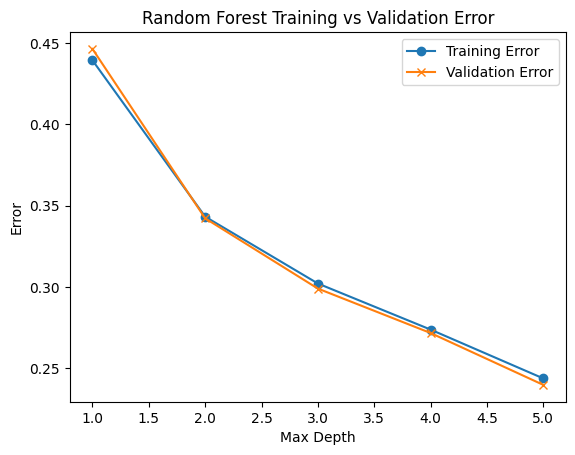

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.80      0.63      0.71     13698
           1       0.75      0.87      0.81     16837

    accuracy                           0.77     30535
   macro avg       0.77      0.75      0.76     30535
weighted avg       0.77      0.77      0.76     30535



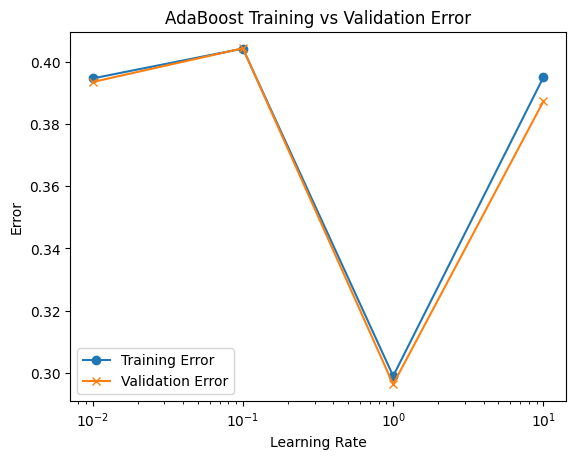

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.69      0.61      0.65     13698
           1       0.71      0.78      0.74     16837

    accuracy                           0.70     30535
   macro avg       0.70      0.69      0.70     30535
weighted avg       0.70      0.70      0.70     30535

  Partition 20.0 / 80.0:


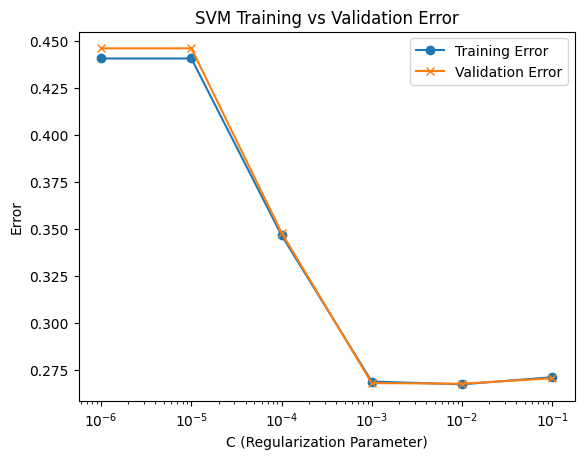

    Best SVM Hyperparameter (C): 0.01
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.69      0.70     21798
           1       0.75      0.77      0.76     27058

    accuracy                           0.73     48856
   macro avg       0.73      0.73      0.73     48856
weighted avg       0.73      0.73      0.73     48856



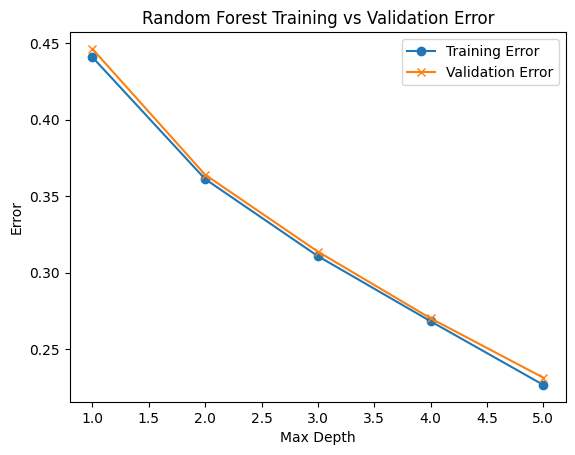

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.77      0.65      0.71     21798
           1       0.75      0.84      0.79     27058

    accuracy                           0.76     48856
   macro avg       0.76      0.75      0.75     48856
weighted avg       0.76      0.76      0.75     48856



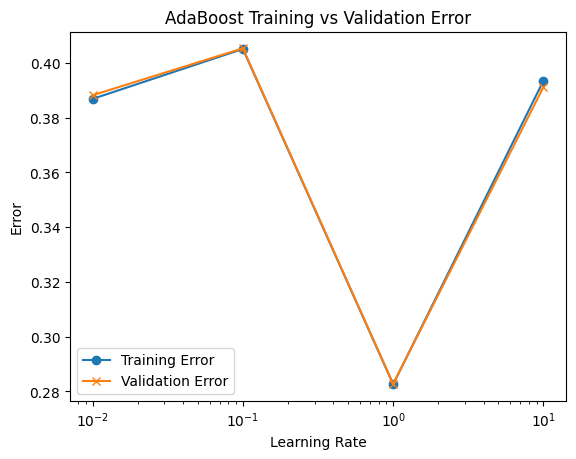

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.71      0.63      0.67     21798
           1       0.73      0.79      0.76     27058

    accuracy                           0.72     48856
   macro avg       0.72      0.71      0.71     48856
weighted avg       0.72      0.72      0.72     48856


Trial 2
  Partition 80.0 / 20.0:


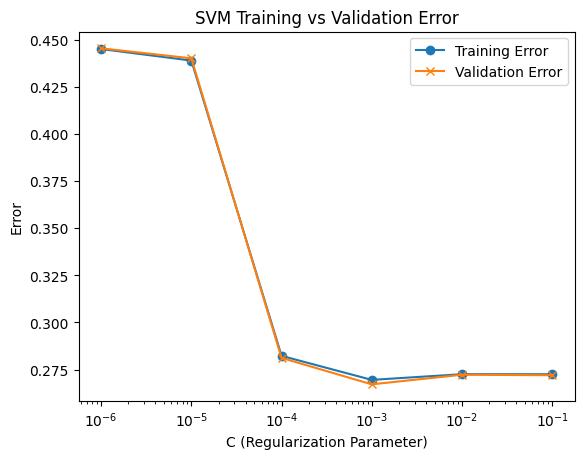

    Best SVM Hyperparameter (C): 0.001
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.71      0.69      0.70      5440
           1       0.75      0.77      0.76      6774

    accuracy                           0.73     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.73      0.73      0.73     12214



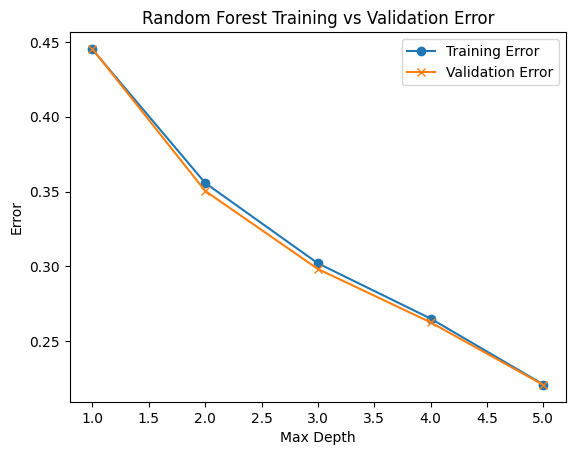

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.79      0.69      0.74      5440
           1       0.77      0.86      0.81      6774

    accuracy                           0.78     12214
   macro avg       0.78      0.77      0.77     12214
weighted avg       0.78      0.78      0.78     12214



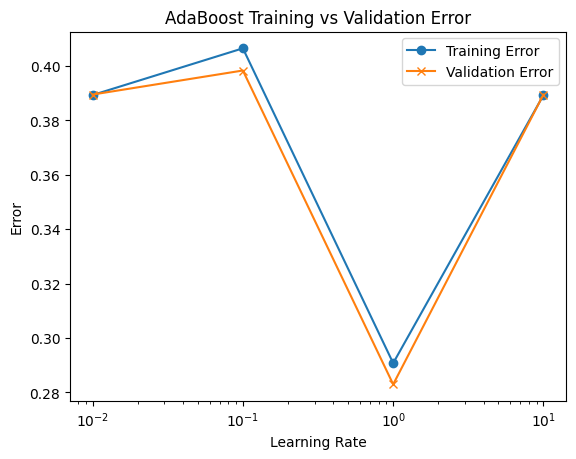

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.71      0.63      0.66      5440
           1       0.72      0.79      0.76      6774

    accuracy                           0.72     12214
   macro avg       0.72      0.71      0.71     12214
weighted avg       0.72      0.72      0.71     12214

  Partition 50.0 / 50.0:


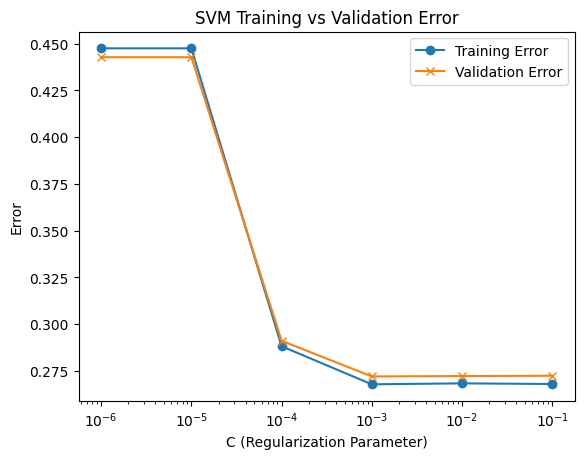

    Best SVM Hyperparameter (C): 0.001
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.68      0.69     13518
           1       0.75      0.76      0.76     17017

    accuracy                           0.73     30535
   macro avg       0.72      0.72      0.72     30535
weighted avg       0.73      0.73      0.73     30535



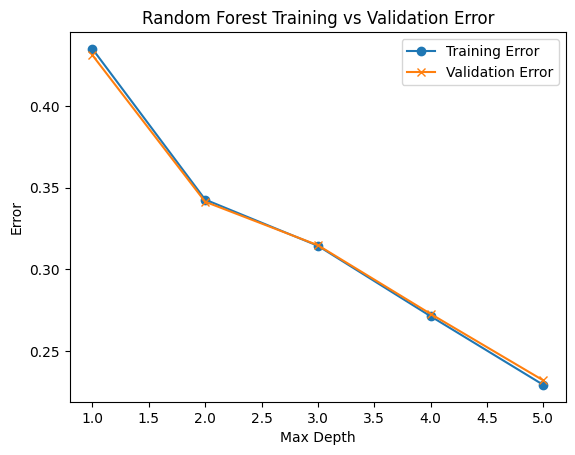

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.79      0.69      0.74     13518
           1       0.78      0.86      0.81     17017

    accuracy                           0.78     30535
   macro avg       0.78      0.77      0.78     30535
weighted avg       0.78      0.78      0.78     30535



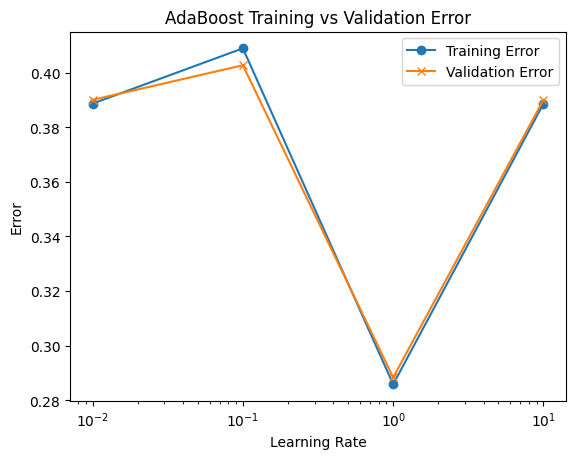

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.70      0.62      0.65     13518
           1       0.72      0.79      0.75     17017

    accuracy                           0.71     30535
   macro avg       0.71      0.70      0.70     30535
weighted avg       0.71      0.71      0.71     30535

  Partition 20.0 / 80.0:


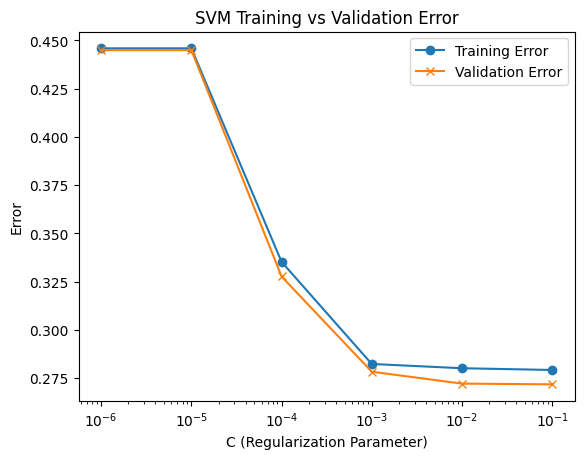

    Best SVM Hyperparameter (C): 0.1
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.69      0.69      0.69     21736
           1       0.76      0.76      0.76     27120

    accuracy                           0.73     48856
   macro avg       0.72      0.72      0.72     48856
weighted avg       0.73      0.73      0.73     48856



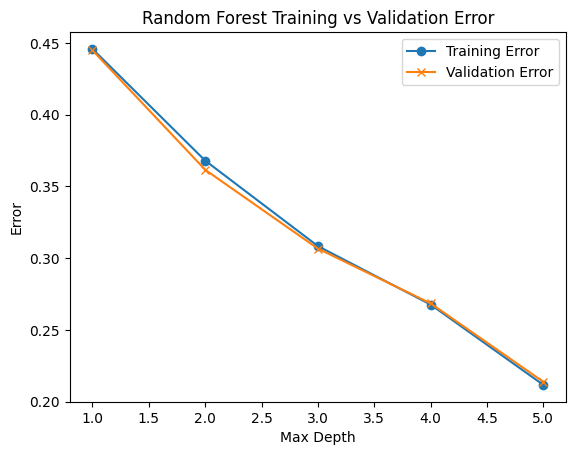

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.75      0.70      0.72     21736
           1       0.77      0.81      0.79     27120

    accuracy                           0.76     48856
   macro avg       0.76      0.76      0.76     48856
weighted avg       0.76      0.76      0.76     48856



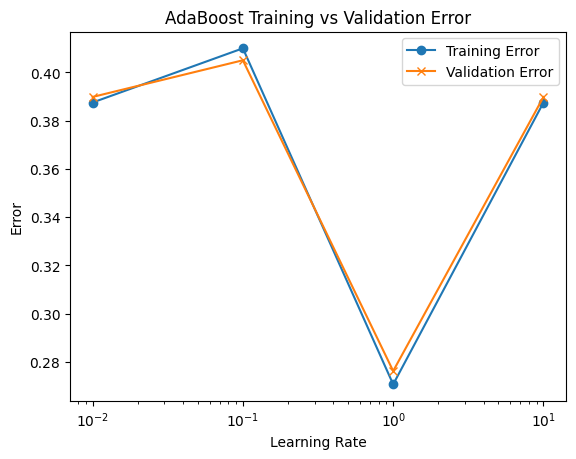

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.72      0.62      0.67     21736
           1       0.73      0.80      0.76     27120

    accuracy                           0.72     48856
   macro avg       0.72      0.71      0.72     48856
weighted avg       0.72      0.72      0.72     48856


Trial 3
  Partition 80.0 / 20.0:


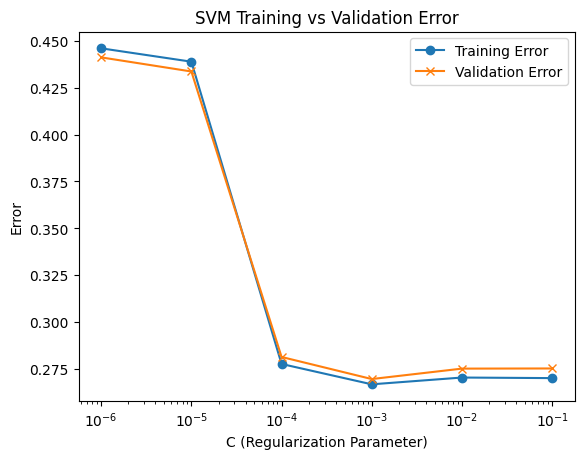

    Best SVM Hyperparameter (C): 0.001
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.69      0.69      5389
           1       0.76      0.76      0.76      6825

    accuracy                           0.73     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.73      0.73      0.73     12214



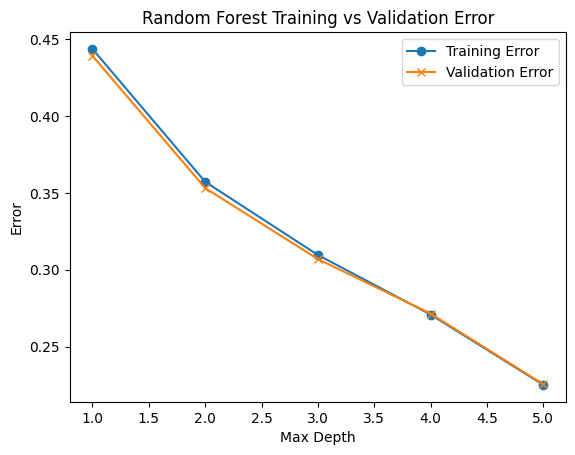

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.78      0.66      0.71      5389
           1       0.76      0.86      0.81      6825

    accuracy                           0.77     12214
   macro avg       0.77      0.76      0.76     12214
weighted avg       0.77      0.77      0.77     12214



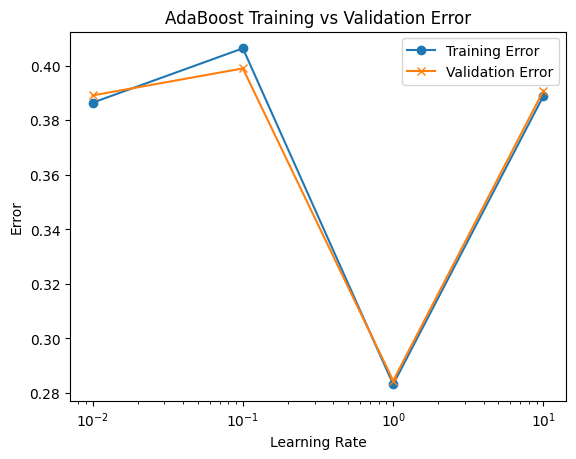

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.69      0.65      0.67      5389
           1       0.73      0.77      0.75      6825

    accuracy                           0.72     12214
   macro avg       0.71      0.71      0.71     12214
weighted avg       0.71      0.72      0.71     12214

  Partition 50.0 / 50.0:


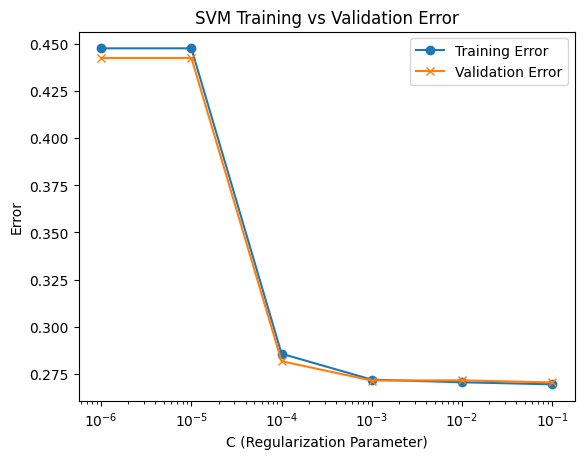

    Best SVM Hyperparameter (C): 0.1
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.69      0.71      0.70     13513
           1       0.76      0.75      0.76     17022

    accuracy                           0.73     30535
   macro avg       0.73      0.73      0.73     30535
weighted avg       0.73      0.73      0.73     30535



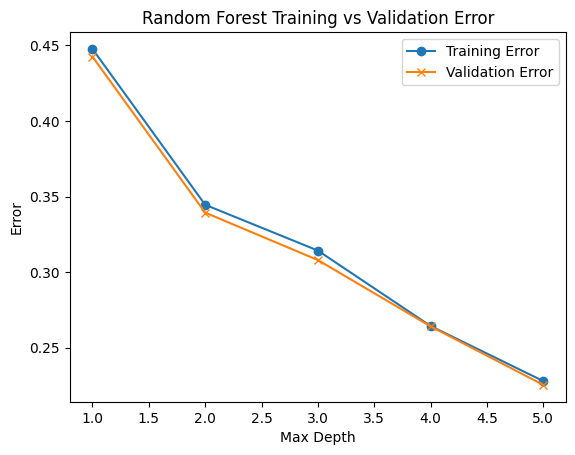

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.74      0.70      0.72     13513
           1       0.77      0.80      0.79     17022

    accuracy                           0.76     30535
   macro avg       0.75      0.75      0.75     30535
weighted avg       0.76      0.76      0.76     30535



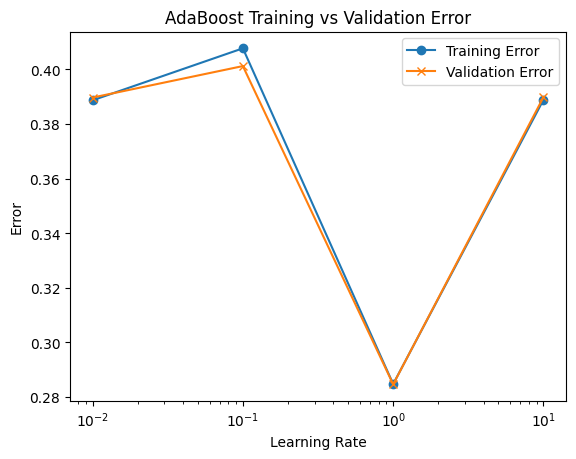

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.70      0.62      0.66     13513
           1       0.72      0.79      0.76     17022

    accuracy                           0.72     30535
   macro avg       0.71      0.71      0.71     30535
weighted avg       0.71      0.72      0.71     30535

  Partition 20.0 / 80.0:


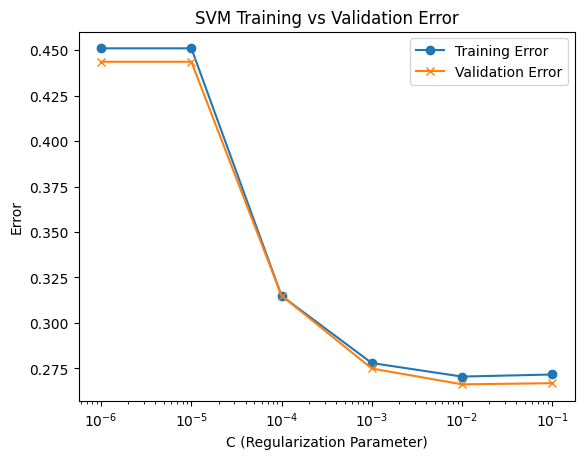

    Best SVM Hyperparameter (C): 0.01
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.69      0.70     21673
           1       0.76      0.77      0.76     27183

    accuracy                           0.73     48856
   macro avg       0.73      0.73      0.73     48856
weighted avg       0.73      0.73      0.73     48856



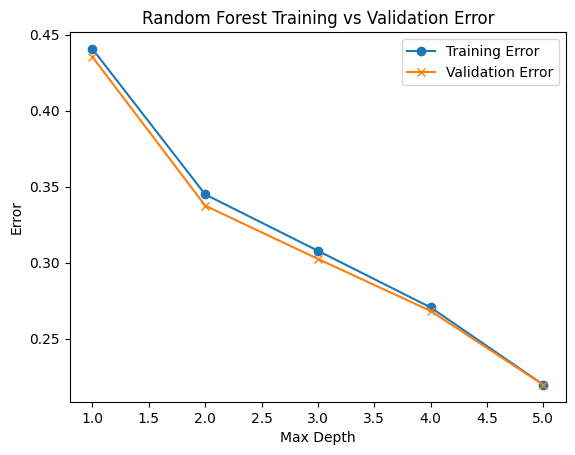

    Best RF Hyperparameter (Max Depth): 5
    Random Forest:
              precision    recall  f1-score   support

          -1       0.76      0.69      0.72     21673
           1       0.77      0.83      0.80     27183

    accuracy                           0.77     48856
   macro avg       0.76      0.76      0.76     48856
weighted avg       0.76      0.77      0.76     48856



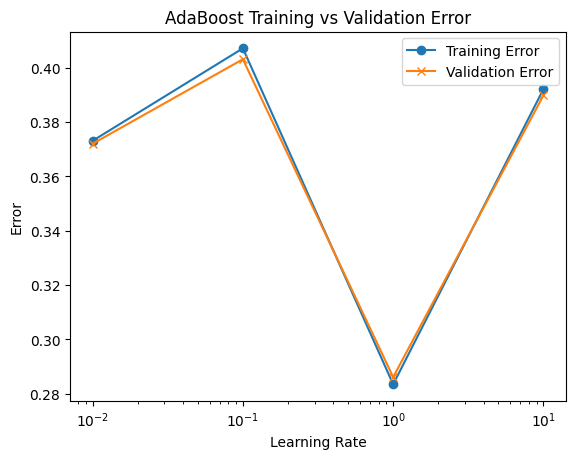

    Best AdaBoost Hyperparameter (Learning Rate): 1
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.70      0.63      0.66     21673
           1       0.73      0.78      0.75     27183

    accuracy                           0.71     48856
   macro avg       0.71      0.71      0.71     48856
weighted avg       0.71      0.71      0.71     48856



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# trials
for trial in range(3):  #3 trials
    print(f"\nTrial {trial + 1}")

    X, y = shuffle(X_adult, y_adult, random_state=trial)

    partitions = [0.2, 0.5, 0.8]

    for i in range(3): 
        partition_size = partitions[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=partition_size, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        print(f"  Partition {100 - (partition_size * 100)} / {partition_size * 100}:")

        svm_train_accuracies = []
        svm_val_accuracies = []
        rf_train_accuracies = []
        rf_val_accuracies = []
        ab_train_accuracies = []
        ab_val_accuracies = []

        #hyper parameter tuning 
        for model_index in range(3):
            if model_index == 0:  # SVM
                classifier_svm = SVC(kernel='linear')
                C_list = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]

                # 5-fold cross validation with GridSearch instead of 10 (takes too long)
                grid_svm = GridSearchCV(classifier_svm, {'C': C_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_svm.fit(X_train, y_train)

                best_svm = grid_svm.best_estimator_

                svm_train_accuracies.append(grid_svm.cv_results_['mean_train_score'])
                svm_val_accuracies.append(grid_svm.cv_results_['mean_test_score'])

                pred_svm = best_svm.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_svm)
                print(f"    Best SVM C: {grid_svm.best_params_['C']}")
                print(f"    SVM Testing Accuracy: {test_accuracy:.4f}")
                print(f"    Support Vector Machine:\n{classification_report(y_test, pred_svm)}")

            elif model_index == 1:  # Random Forest
                classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
                max_depth_list = [1, 2, 3, 4, 5]

                grid_rf = GridSearchCV(classifier_rf, {'max_depth': max_depth_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_rf.fit(X_train, y_train)

                best_rf = grid_rf.best_estimator_

                rf_train_accuracies.append(grid_rf.cv_results_['mean_train_score'])
                rf_val_accuracies.append(grid_rf.cv_results_['mean_test_score'])

                pred_rf = best_rf.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_rf)
                print(f"    Best RF Max Depth: {grid_rf.best_params_['max_depth']}")
                print(f"    RF Testing Accuracy: {test_accuracy:.4f}")
                print(f"    Random Forest:\n{classification_report(y_test, pred_rf)}")

            elif model_index == 2:  # AdaBoost
                classifier_ab = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
                learning_rate_list = [0.01, 0.1, 1, 10]

                grid_ab = GridSearchCV(classifier_ab, {'learning_rate': learning_rate_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_ab.fit(X_train, y_train)

                best_ab = grid_ab.best_estimator_

                ab_train_accuracies.append(grid_ab.cv_results_['mean_train_score'])
                ab_val_accuracies.append(grid_ab.cv_results_['mean_test_score'])

                pred_ab = best_ab.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_ab)
                print(f"    best AdaBoost learning rate: {grid_ab.best_params_['learning_rate']}")
                print(f"    AdaBoost testing accuracy: {test_accuracy:.4f}")
                print(f"    AdaBoost:\n{classification_report(y_test, pred_ab)}")

        models = ['SVM', 'Random Forest', 'AdaBoost']
        accuracies_train = [svm_train_accuracies, rf_train_accuracies, ab_train_accuracies]
        accuracies_val = [svm_val_accuracies, rf_val_accuracies, ab_val_accuracies]
        
        for model_idx, model_name in enumerate(models):
            plt.figure(figsize=(8, 6))
            plt.plot(C_list, accuracies_train[model_idx][0], label="Training Accuracy", marker='o')
            plt.plot(C_list, accuracies_val[model_idx][0], label="Validation Accuracy", marker='x')
            plt.xscale('log')
            plt.xlabel('Hyperparameter Value')
            plt.ylabel('Accuracy')
            plt.title(f'{model_name} Accuracy vs Hyperparameter - Partition {100 - (partition_size * 100)} / {partition_size * 100}')
            plt.legend()
            plt.show()

### Mushroom dataset testing


Trial 1
  Partition 80.0 / 20.0:
    Best SVM C: 0.01
    SVM Testing Accuracy: 0.7351
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.71      0.70      0.70      5483
           1       0.76      0.76      0.76      6731

    accuracy                           0.74     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.74      0.74      0.74     12214

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7733
    Random Forest:
              precision    recall  f1-score   support

          -1       0.79      0.67      0.73      5483
           1       0.76      0.86      0.81      6731

    accuracy                           0.77     12214
   macro avg       0.78      0.76      0.77     12214
weighted avg       0.78      0.77      0.77     12214

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7162
    AdaBoost:
              precision    recall  f1-score   support

          -1

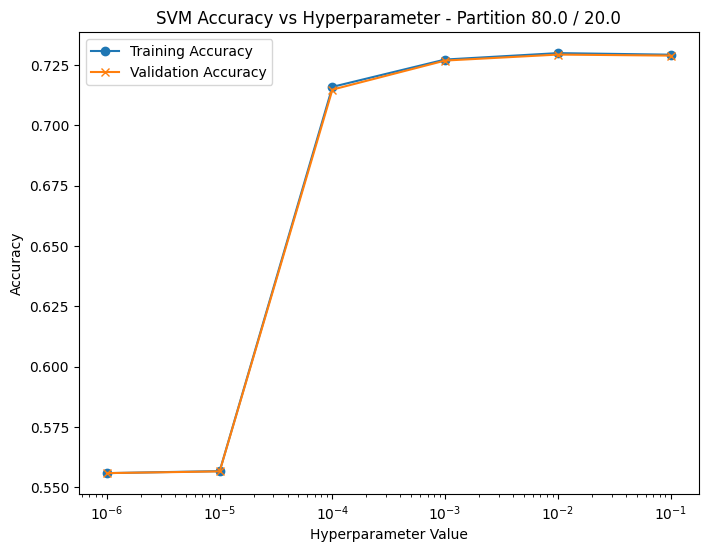

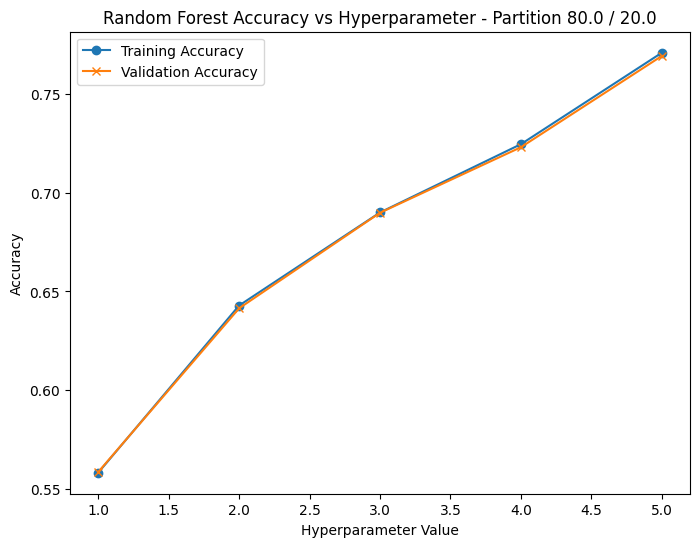

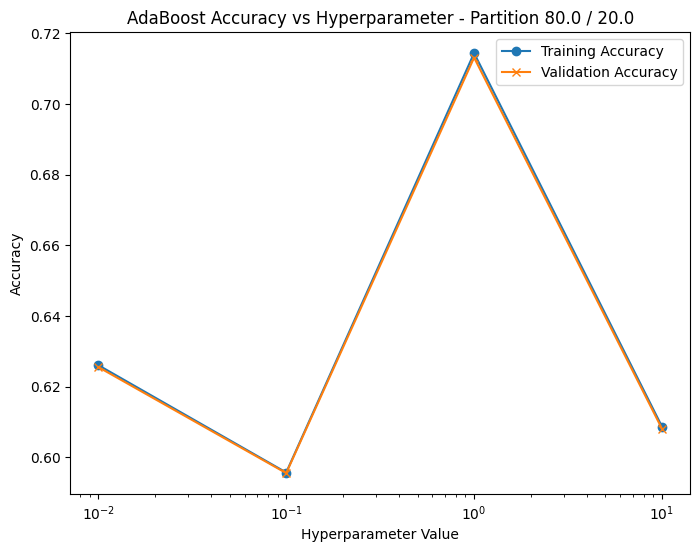

  Partition 50.0 / 50.0:
    Best SVM C: 0.01
    SVM Testing Accuracy: 0.7294
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.69      0.70     13698
           1       0.75      0.76      0.76     16837

    accuracy                           0.73     30535
   macro avg       0.73      0.73      0.73     30535
weighted avg       0.73      0.73      0.73     30535

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7718
    Random Forest:
              precision    recall  f1-score   support

          -1       0.80      0.66      0.72     13698
           1       0.76      0.87      0.81     16837

    accuracy                           0.77     30535
   macro avg       0.78      0.76      0.76     30535
weighted avg       0.78      0.77      0.77     30535

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7037
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.

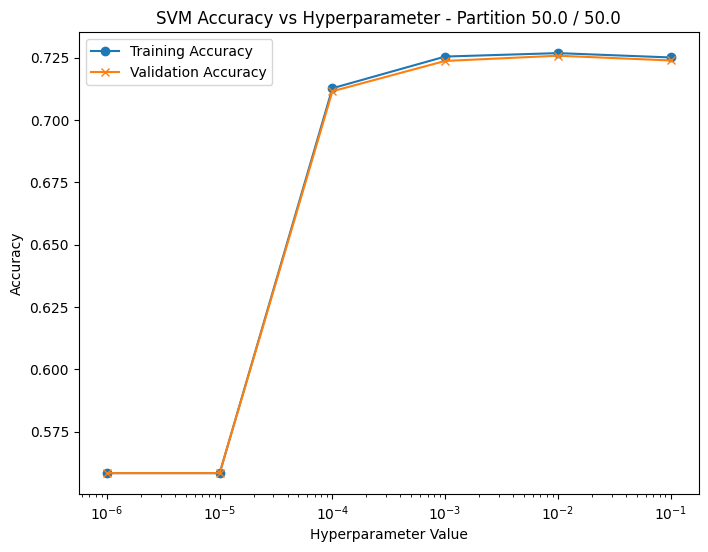

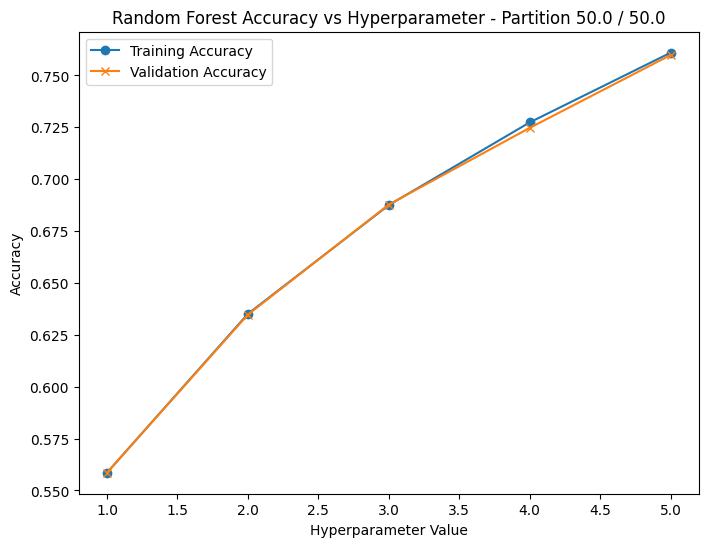

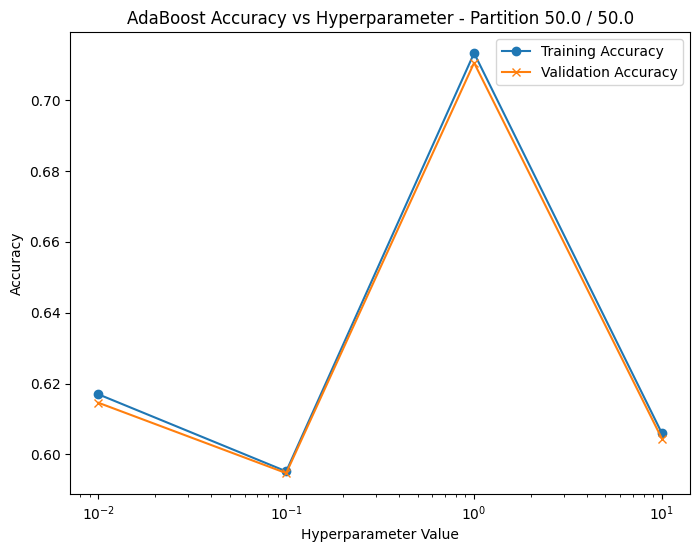

  Partition 20.0 / 80.0:
    Best SVM C: 0.01
    SVM Testing Accuracy: 0.7325
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.69      0.70     21798
           1       0.75      0.77      0.76     27058

    accuracy                           0.73     48856
   macro avg       0.73      0.73      0.73     48856
weighted avg       0.73      0.73      0.73     48856

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7574
    Random Forest:
              precision    recall  f1-score   support

          -1       0.77      0.65      0.70     21798
           1       0.75      0.85      0.79     27058

    accuracy                           0.76     48856
   macro avg       0.76      0.75      0.75     48856
weighted avg       0.76      0.76      0.75     48856

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7173
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.

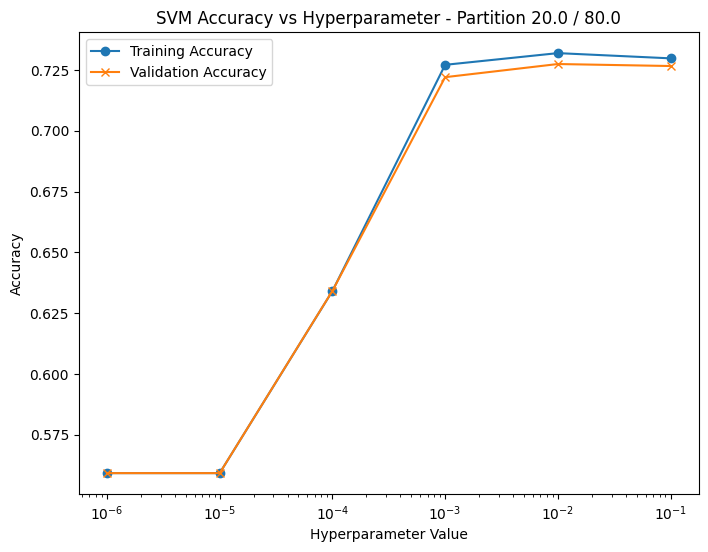

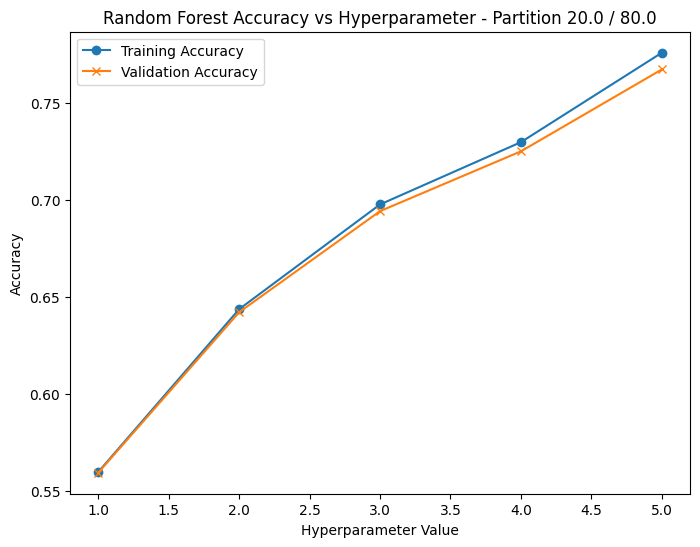

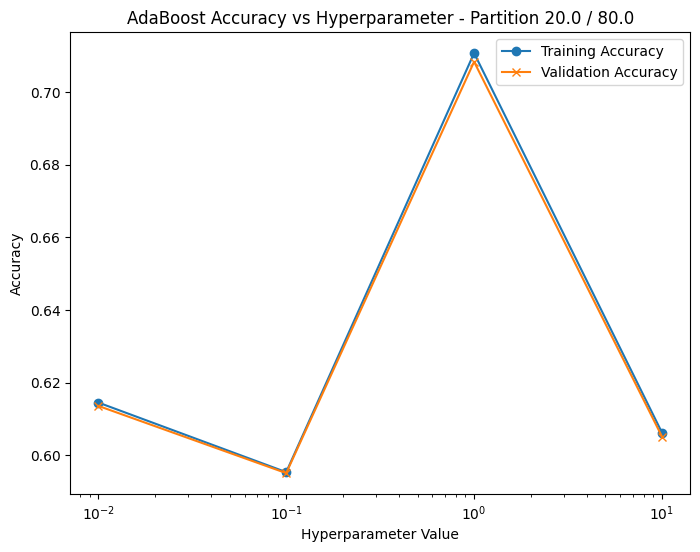


Trial 2
  Partition 80.0 / 20.0:
    Best SVM C: 0.001
    SVM Testing Accuracy: 0.7328
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.71      0.69      0.70      5440
           1       0.75      0.77      0.76      6774

    accuracy                           0.73     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.73      0.73      0.73     12214

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7760
    Random Forest:
              precision    recall  f1-score   support

          -1       0.79      0.67      0.73      5440
           1       0.77      0.86      0.81      6774

    accuracy                           0.78     12214
   macro avg       0.78      0.77      0.77     12214
weighted avg       0.78      0.78      0.77     12214

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7170
    AdaBoost:
              precision    recall  f1-score   support

          -

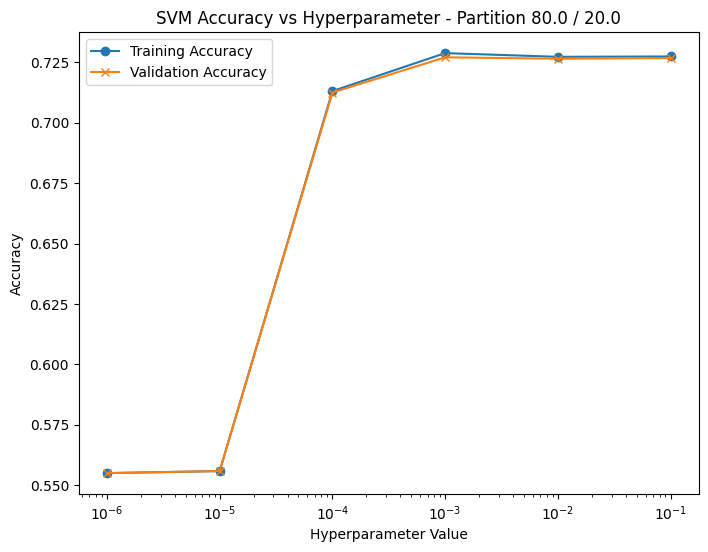

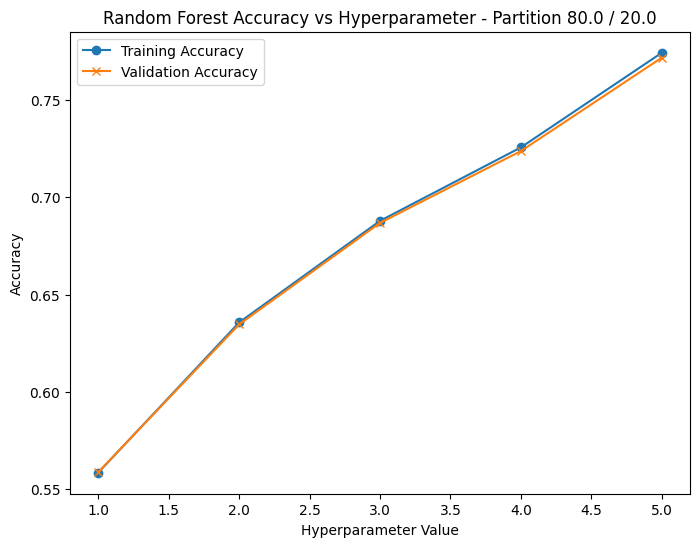

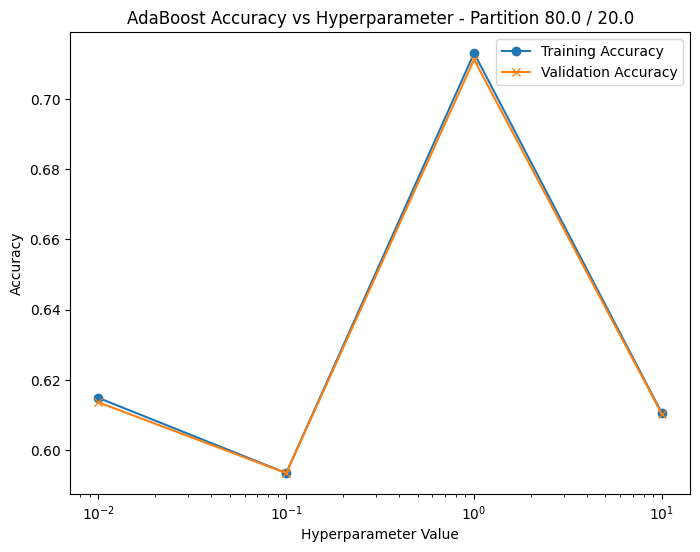

  Partition 50.0 / 50.0:
    Best SVM C: 0.1
    SVM Testing Accuracy: 0.7276
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.69      0.70      0.69     13518
           1       0.76      0.75      0.75     17017

    accuracy                           0.73     30535
   macro avg       0.72      0.72      0.72     30535
weighted avg       0.73      0.73      0.73     30535

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7713
    Random Forest:
              precision    recall  f1-score   support

          -1       0.77      0.68      0.73     13518
           1       0.77      0.84      0.80     17017

    accuracy                           0.77     30535
   macro avg       0.77      0.76      0.76     30535
weighted avg       0.77      0.77      0.77     30535

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7116
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.7

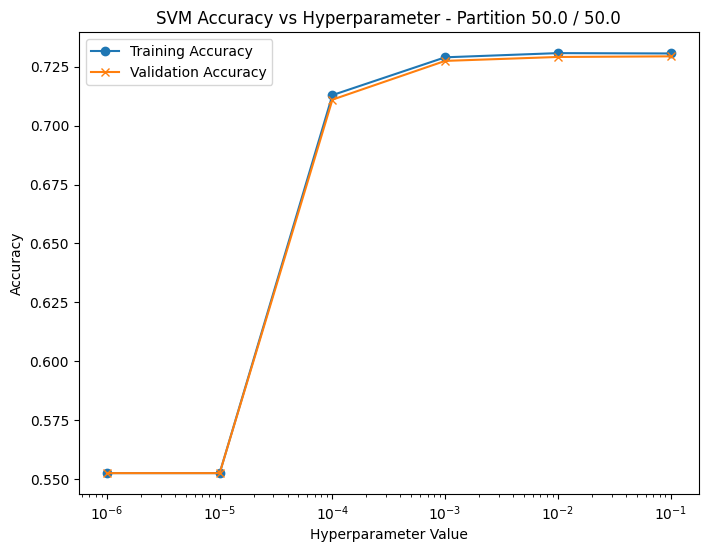

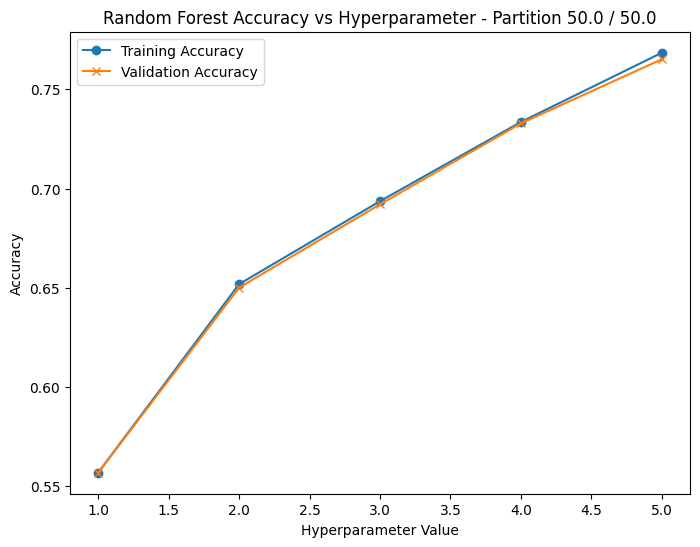

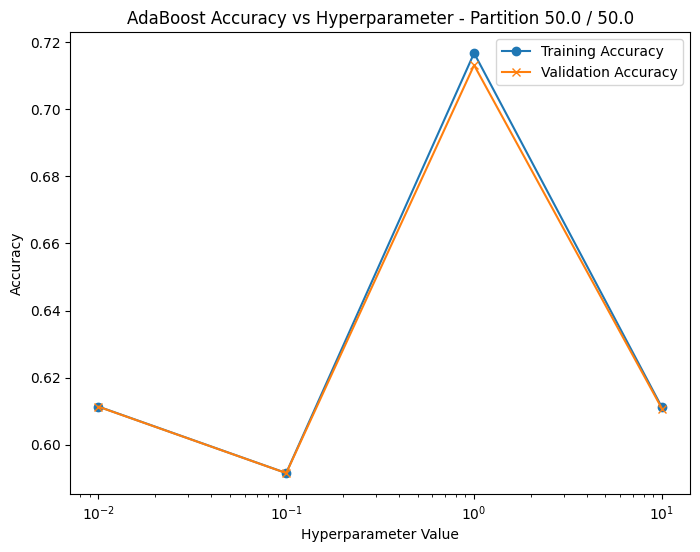

  Partition 20.0 / 80.0:
    Best SVM C: 0.1
    SVM Testing Accuracy: 0.7282
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.69      0.69      0.69     21736
           1       0.76      0.76      0.76     27120

    accuracy                           0.73     48856
   macro avg       0.72      0.72      0.72     48856
weighted avg       0.73      0.73      0.73     48856

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7736
    Random Forest:
              precision    recall  f1-score   support

          -1       0.78      0.69      0.73     21736
           1       0.77      0.84      0.81     27120

    accuracy                           0.77     48856
   macro avg       0.77      0.76      0.77     48856
weighted avg       0.77      0.77      0.77     48856

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7237
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.7

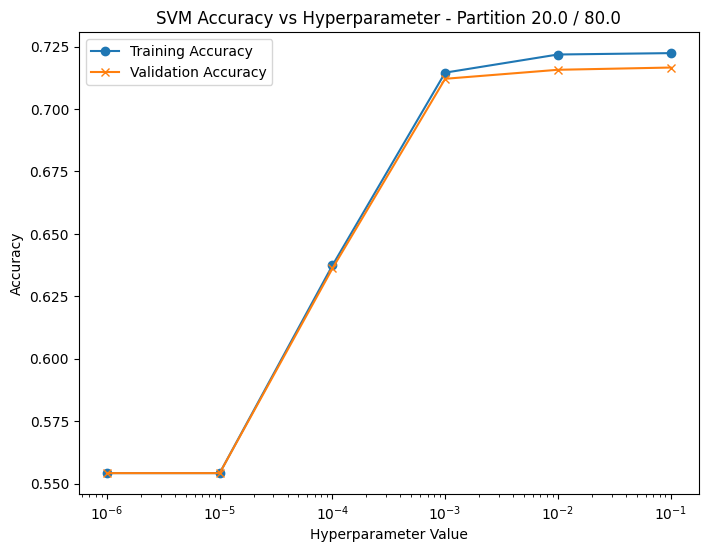

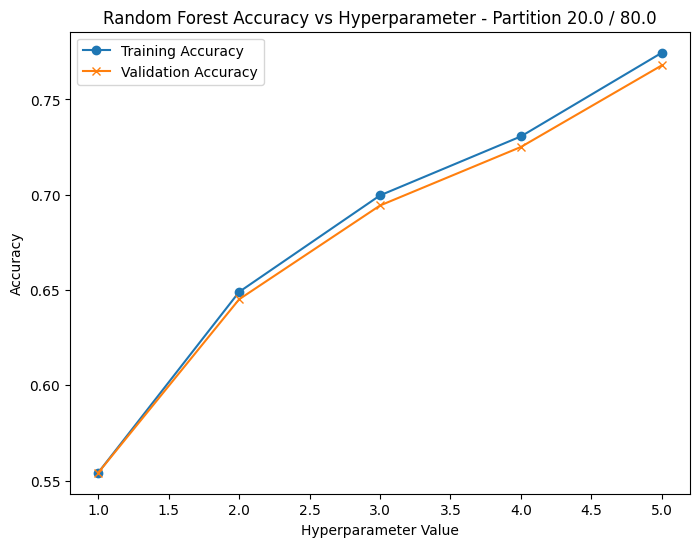

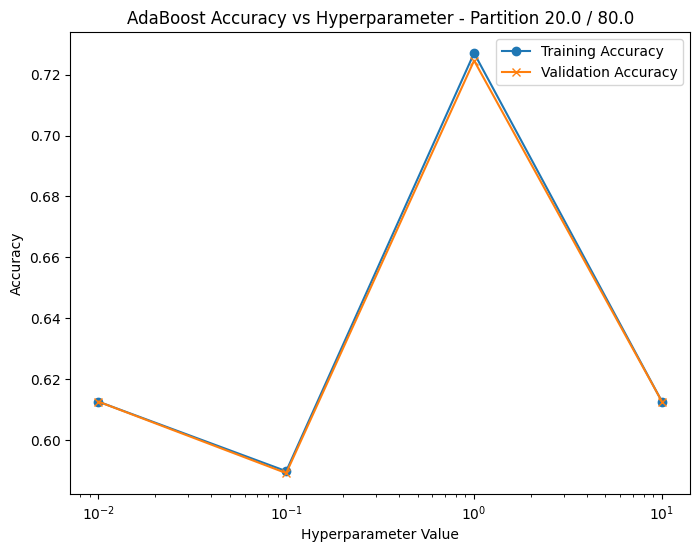


Trial 3
  Partition 80.0 / 20.0:
    Best SVM C: 0.001
    SVM Testing Accuracy: 0.7306
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.69      0.69      5389
           1       0.76      0.76      0.76      6825

    accuracy                           0.73     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.73      0.73      0.73     12214

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7745
    Random Forest:
              precision    recall  f1-score   support

          -1       0.78      0.68      0.73      5389
           1       0.77      0.85      0.81      6825

    accuracy                           0.77     12214
   macro avg       0.78      0.76      0.77     12214
weighted avg       0.78      0.77      0.77     12214

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7156
    AdaBoost:
              precision    recall  f1-score   support

          -

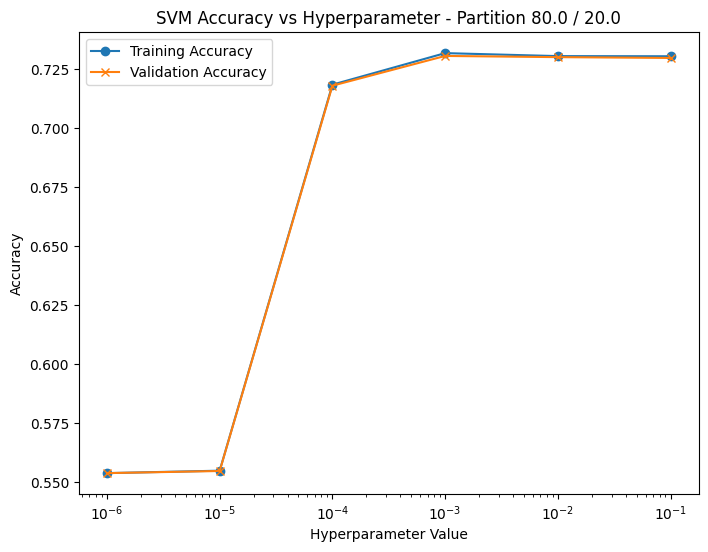

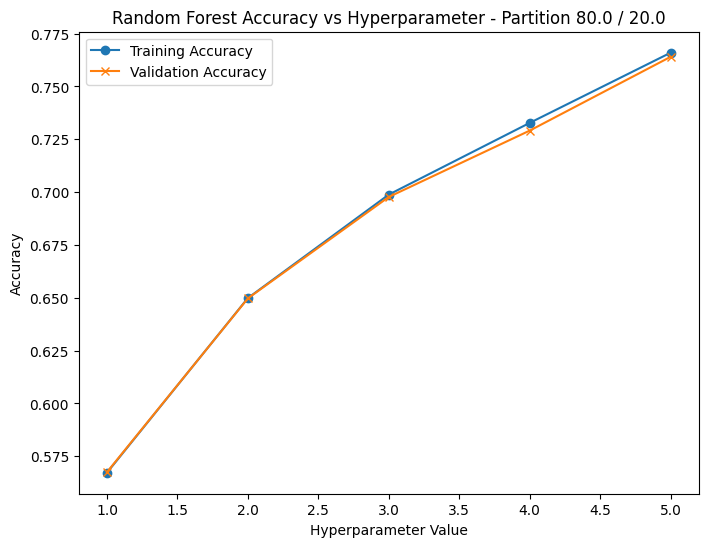

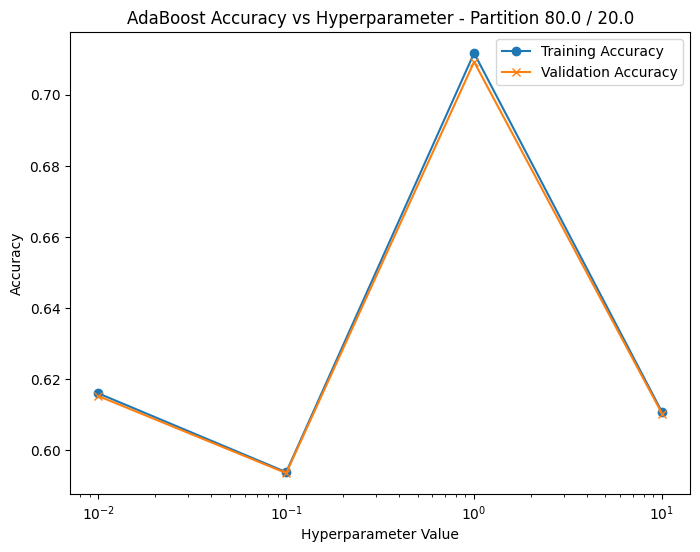

  Partition 50.0 / 50.0:
    Best SVM C: 0.1
    SVM Testing Accuracy: 0.7295
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.69      0.71      0.70     13513
           1       0.76      0.75      0.76     17022

    accuracy                           0.73     30535
   macro avg       0.73      0.73      0.73     30535
weighted avg       0.73      0.73      0.73     30535

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7849
    Random Forest:
              precision    recall  f1-score   support

          -1       0.80      0.69      0.74     13513
           1       0.78      0.86      0.82     17022

    accuracy                           0.78     30535
   macro avg       0.79      0.77      0.78     30535
weighted avg       0.79      0.78      0.78     30535

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7153
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.7

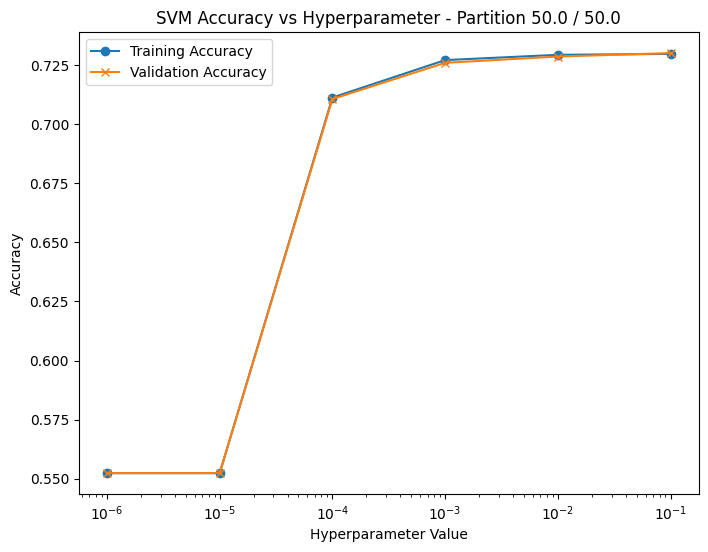

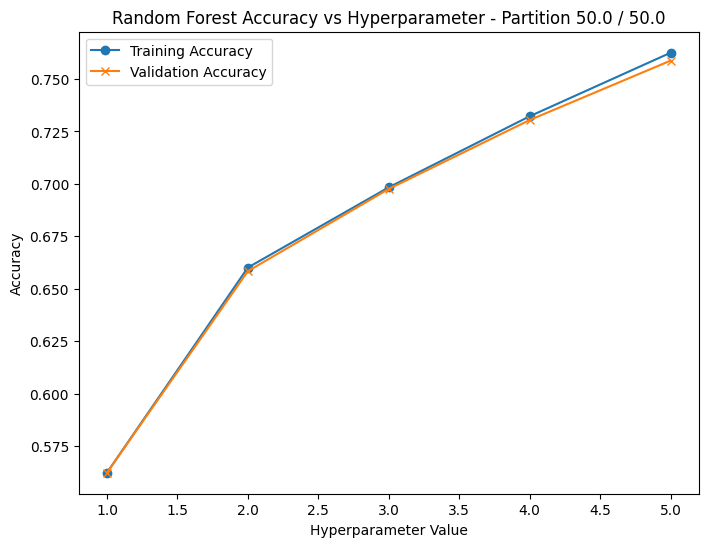

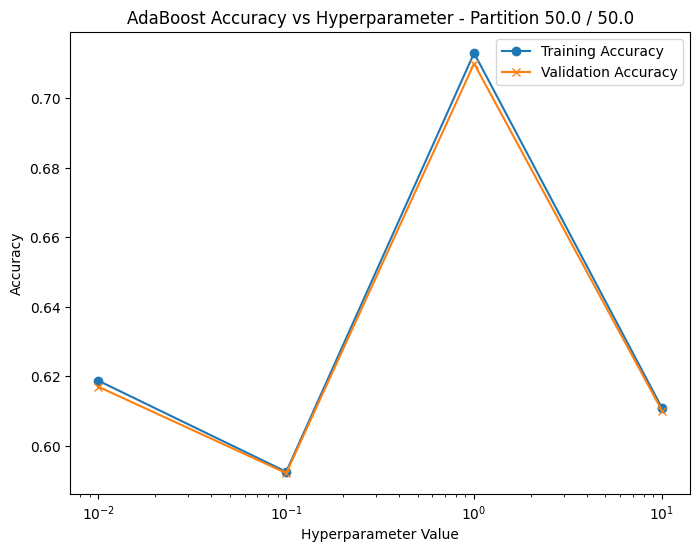

  Partition 20.0 / 80.0:
    Best SVM C: 0.1
    SVM Testing Accuracy: 0.7331
    Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.70      0.69      0.70     21673
           1       0.76      0.77      0.76     27183

    accuracy                           0.73     48856
   macro avg       0.73      0.73      0.73     48856
weighted avg       0.73      0.73      0.73     48856

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.7650
    Random Forest:
              precision    recall  f1-score   support

          -1       0.76      0.69      0.72     21673
           1       0.77      0.82      0.80     27183

    accuracy                           0.77     48856
   macro avg       0.76      0.76      0.76     48856
weighted avg       0.76      0.77      0.76     48856

    Best AdaBoost learning rate: 1
    AdaBoost Testing Accuracy: 0.7139
    AdaBoost:
              precision    recall  f1-score   support

          -1       0.7

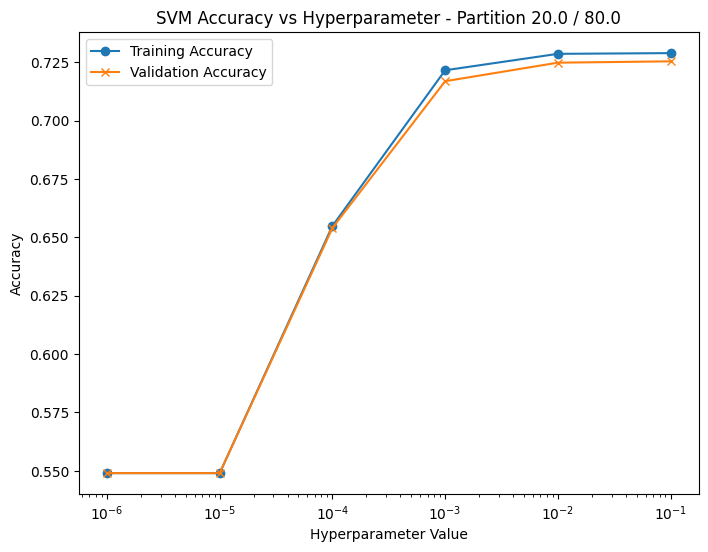

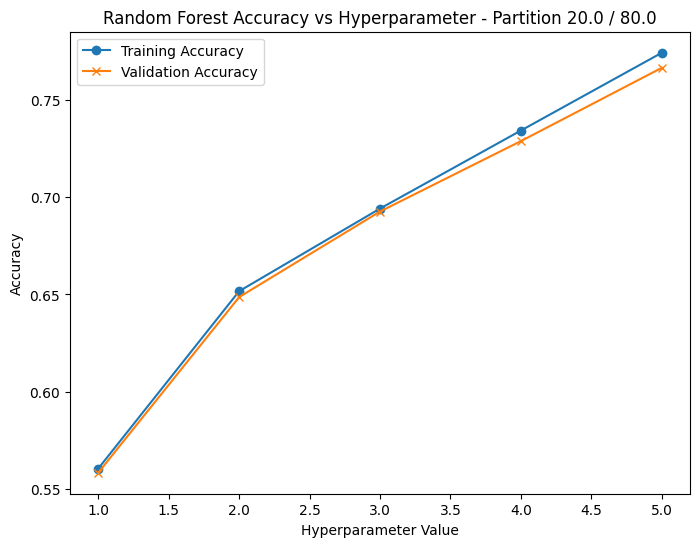

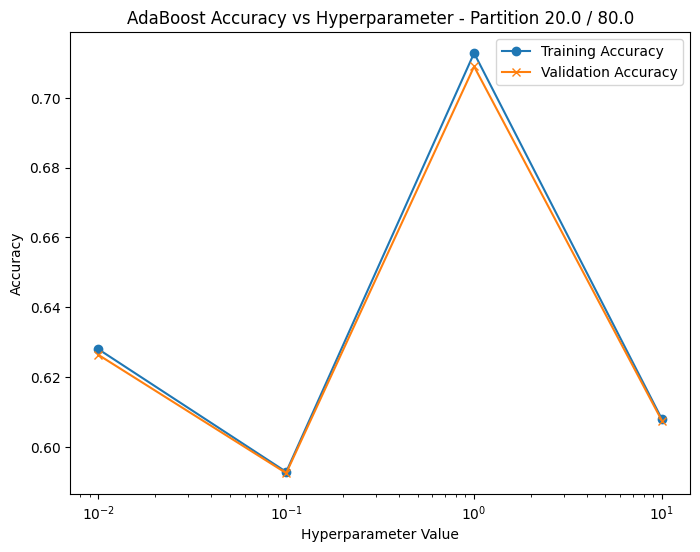

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Trials
for trial in range(3):  # 3 trials
    print(f"\nTrial {trial + 1}")

    X, y = shuffle(X_mushroom, y_mushroom, random_state=trial)

    partitions = [0.2, 0.5, 0.8]

    for i in range(3): 
        partition_size = partitions[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=partition_size, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        print(f"  Partition {100 - (partition_size * 100)} / {partition_size * 100}:")

        svm_train_accuracies = []
        svm_val_accuracies = []
        rf_train_accuracies = []
        rf_val_accuracies = []
        ab_train_accuracies = []
        ab_val_accuracies = []

        # hyperparameter tuning 
        for model_index in range(3):
            if model_index == 0:  # SVM
                classifier_svm = SVC(kernel='linear')
                C_list = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]

                # 5-fold cross validation with GridSearch instead of 10 (takes too long)
                grid_svm = GridSearchCV(classifier_svm, {'C': C_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_svm.fit(X_train, y_train)

                best_svm = grid_svm.best_estimator_

                svm_train_accuracies.append(grid_svm.cv_results_['mean_train_score'])
                svm_val_accuracies.append(grid_svm.cv_results_['mean_test_score'])

                pred_svm = best_svm.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_svm)
                print(f"    Best SVM C: {grid_svm.best_params_['C']}")
                print(f"    SVM Testing Accuracy: {test_accuracy:.4f}")
                print(f"    Support Vector Machine:\n{classification_report(y_test, pred_svm)}")

            elif model_index == 1:  # Random Forest
                classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
                max_depth_list = [1, 2, 3, 4, 5]

                grid_rf = GridSearchCV(classifier_rf, {'max_depth': max_depth_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_rf.fit(X_train, y_train)

                best_rf = grid_rf.best_estimator_

                rf_train_accuracies.append(grid_rf.cv_results_['mean_train_score'])
                rf_val_accuracies.append(grid_rf.cv_results_['mean_test_score'])

                pred_rf = best_rf.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_rf)
                print(f"    Best RF Max Depth: {grid_rf.best_params_['max_depth']}")
                print(f"    RF Testing Accuracy: {test_accuracy:.4f}")
                print(f"    Random Forest:\n{classification_report(y_test, pred_rf)}")

            elif model_index == 2:  # AdaBoost
                classifier_ab = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
                learning_rate_list = [0.01, 0.1, 1, 10]

                grid_ab = GridSearchCV(classifier_ab, {'learning_rate': learning_rate_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_ab.fit(X_train, y_train)

                best_ab = grid_ab.best_estimator_

                ab_train_accuracies.append(grid_ab.cv_results_['mean_train_score'])
                ab_val_accuracies.append(grid_ab.cv_results_['mean_test_score'])

                pred_ab = best_ab.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_ab)
                print(f"    Best AdaBoost learning rate: {grid_ab.best_params_['learning_rate']}")
                print(f"    AdaBoost Testing Accuracy: {test_accuracy:.4f}")
                print(f"    AdaBoost:\n{classification_report(y_test, pred_ab)}")

        models = ['SVM', 'Random Forest', 'AdaBoost']
        accuracies_train = [svm_train_accuracies, rf_train_accuracies, ab_train_accuracies]
        accuracies_val = [svm_val_accuracies, rf_val_accuracies, ab_val_accuracies]
        
        for model_idx, model_name in enumerate(models):
            plt.figure(figsize=(8, 6))

            if model_name == 'SVM':
                x_values = C_list
            elif model_name == 'Random Forest':
                x_values = max_depth_list
            elif model_name == 'AdaBoost':
                x_values = learning_rate_list

            plt.plot(x_values, accuracies_train[model_idx][0], label="Training Accuracy", marker='o')
            plt.plot(x_values, accuracies_val[model_idx][0], label="Validation Accuracy", marker='x')
            
            if model_name in ['SVM', 'AdaBoost']:
                plt.xscale('log')
            
            plt.xlabel('Hyperparameter Value')
            plt.ylabel('Accuracy')
            plt.title(f'{model_name} Accuracy vs Hyperparameter - Partition {100 - (partition_size * 100)} / {partition_size * 100}')
            plt.legend()
            plt.show()


### Bank dataset testing (first run, improved run below!)


Trial 1
  Partition 80.0 / 20.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8425
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12981
         1.0       0.00      0.00      0.00      2427

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8425
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12981
         1.0       0.00      0.00      0.00      2427

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8425
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12981
         1.0       0.00      0.00      0.00      2427

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

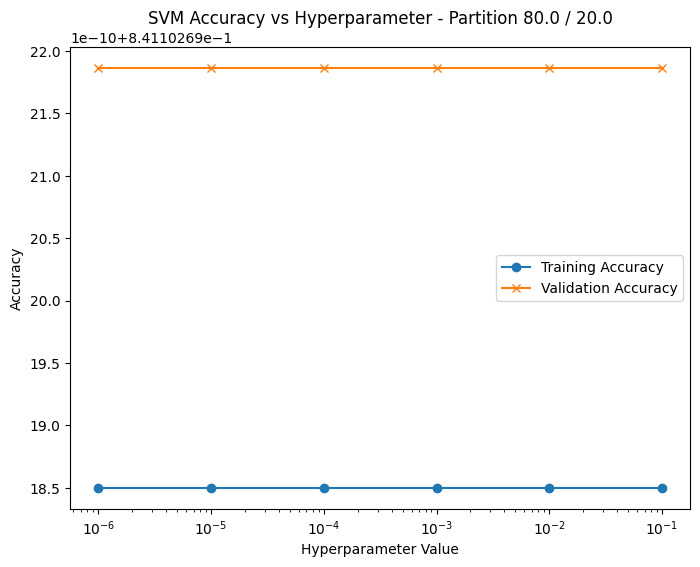

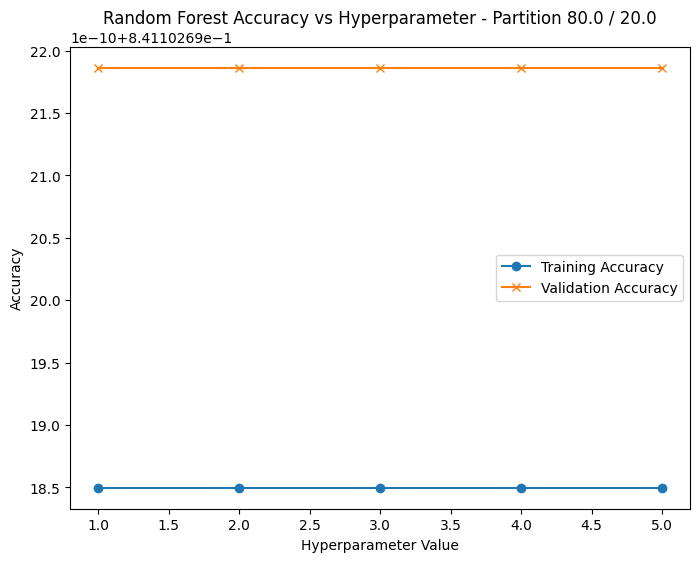

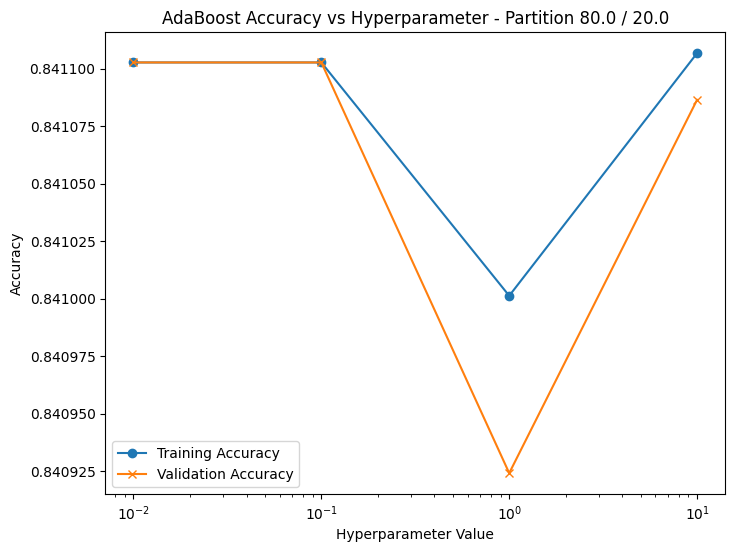

  Partition 50.0 / 50.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8412
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32404
         1.0       0.00      0.00      0.00      6116

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.71      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8412
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32404
         1.0       0.00      0.00      0.00      6116

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.71      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8412
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32404
         1.0       0.00      0.00      0.00      6116

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.71      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

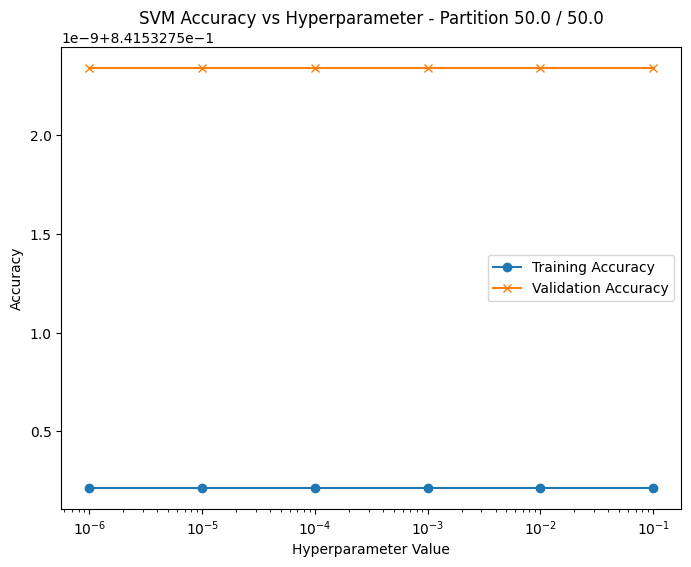

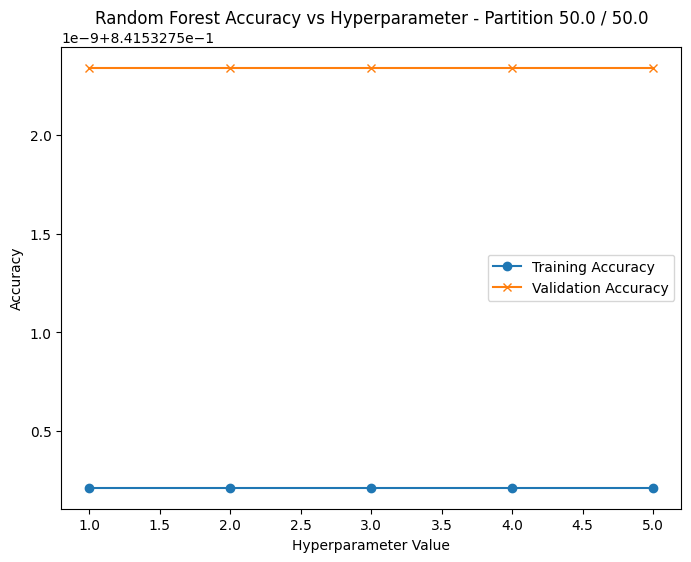

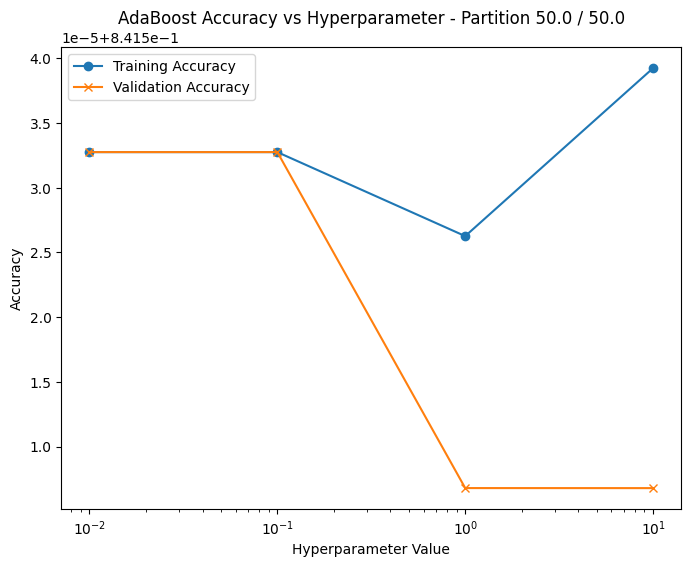

  Partition 20.0 / 80.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8413
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51850
         1.0       0.00      0.00      0.00      9782

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8413
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51850
         1.0       0.00      0.00      0.00      9782

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8413
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51850
         1.0       0.00      0.00      0.00      9782

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

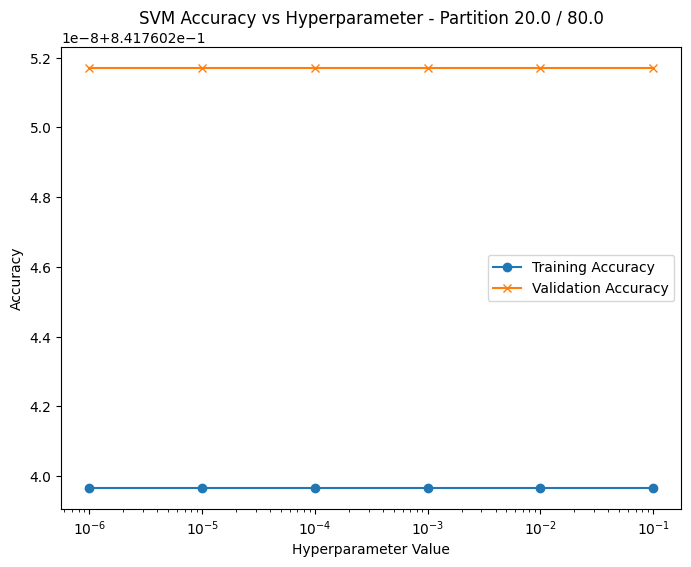

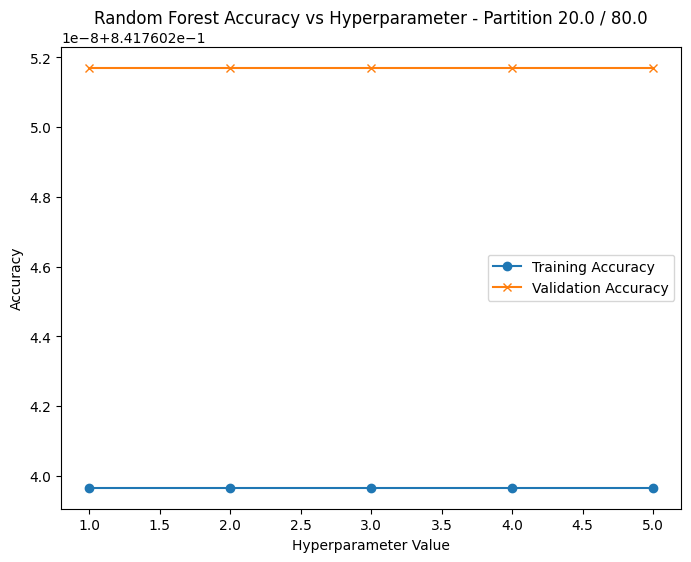

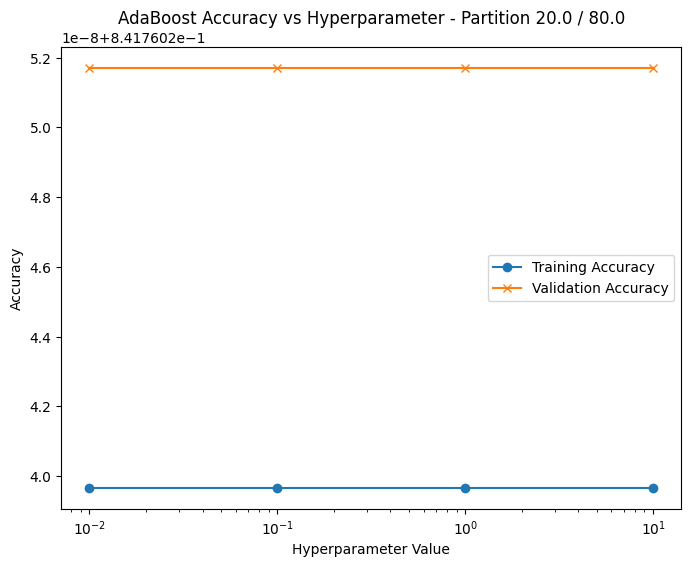


Trial 2
  Partition 80.0 / 20.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8413
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12963
         1.0       0.00      0.00      0.00      2445

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8413
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12963
         1.0       0.00      0.00      0.00      2445

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8413
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12963
         1.0       0.00      0.00      0.00      2445

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

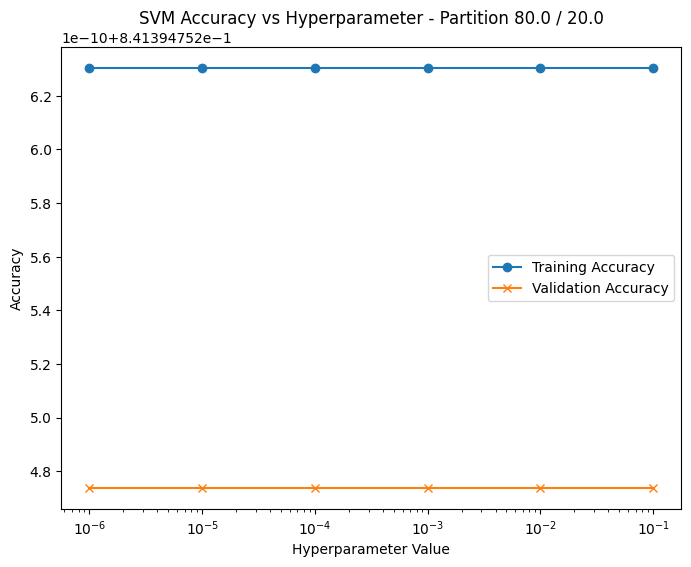

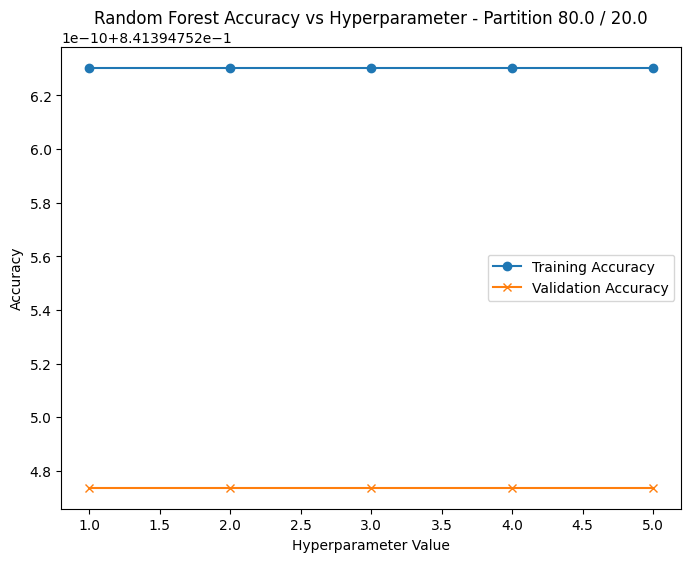

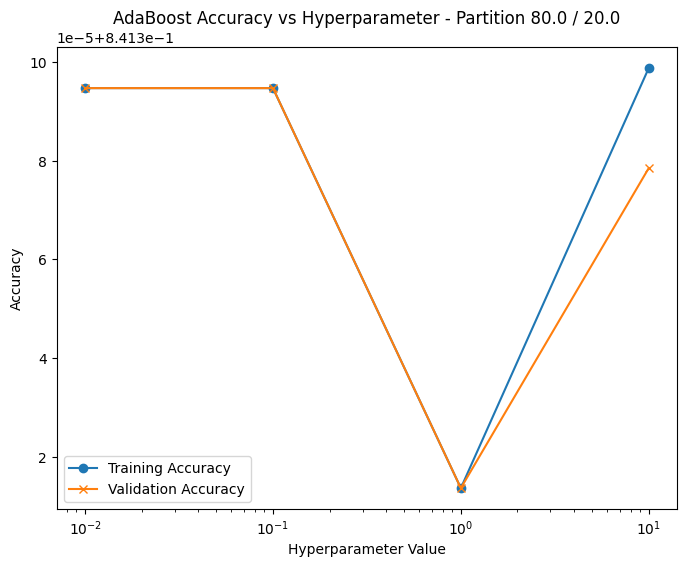

  Partition 50.0 / 50.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8398
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32348
         1.0       0.00      0.00      0.00      6172

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.71      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8398
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32348
         1.0       0.00      0.00      0.00      6172

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.71      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8398
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32348
         1.0       0.00      0.00      0.00      6172

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.71      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

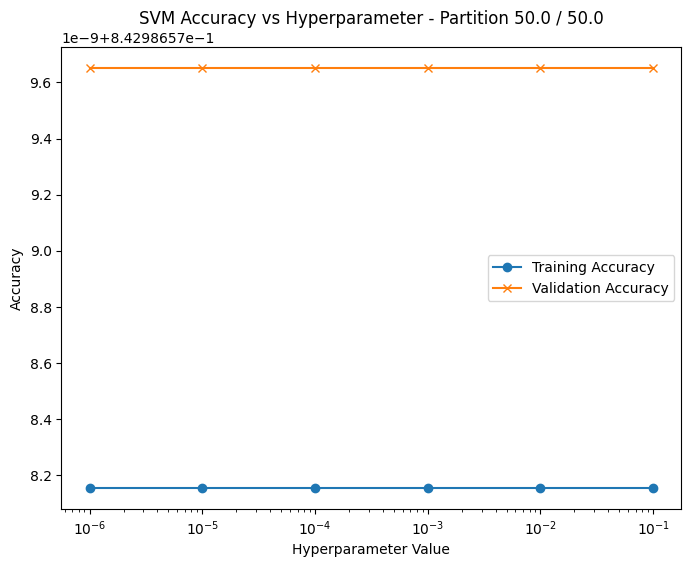

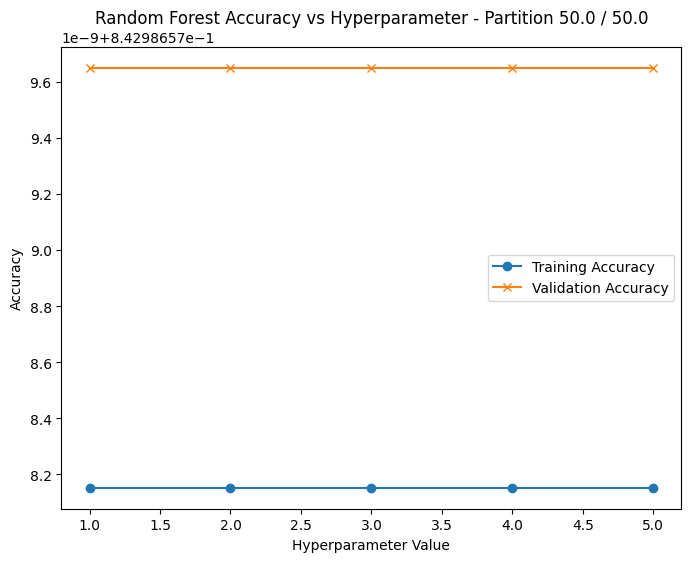

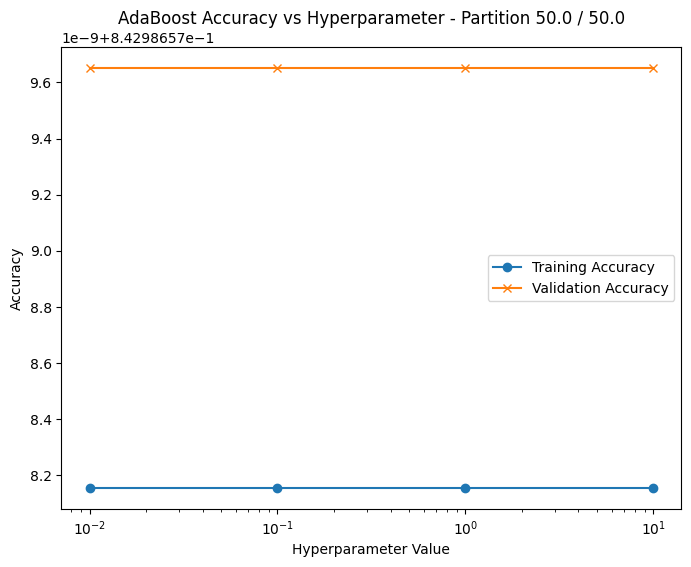

  Partition 20.0 / 80.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8406
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51810
         1.0       0.00      0.00      0.00      9822

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8406
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51810
         1.0       0.00      0.00      0.00      9822

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8406
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51810
         1.0       0.00      0.00      0.00      9822

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

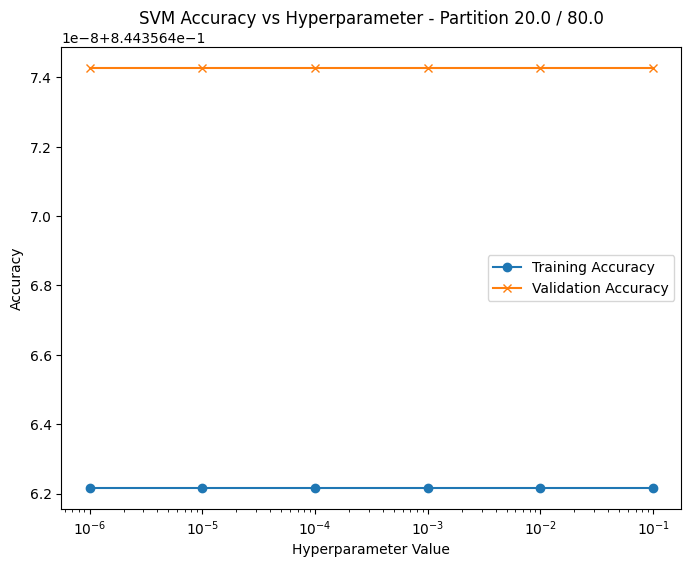

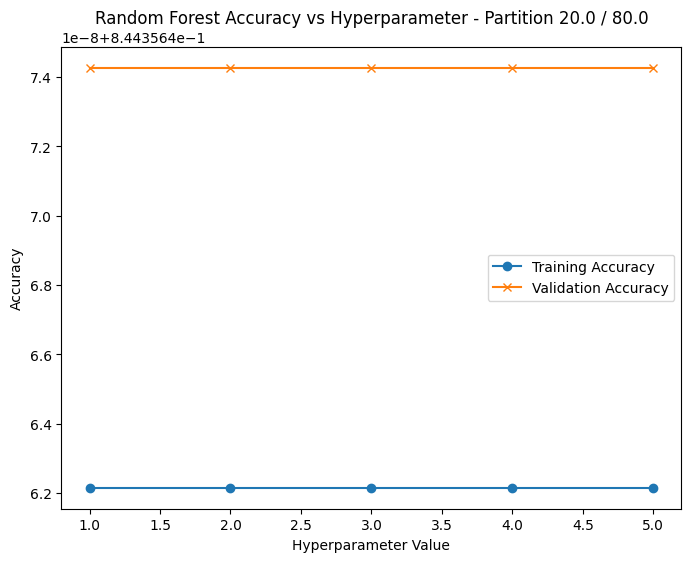

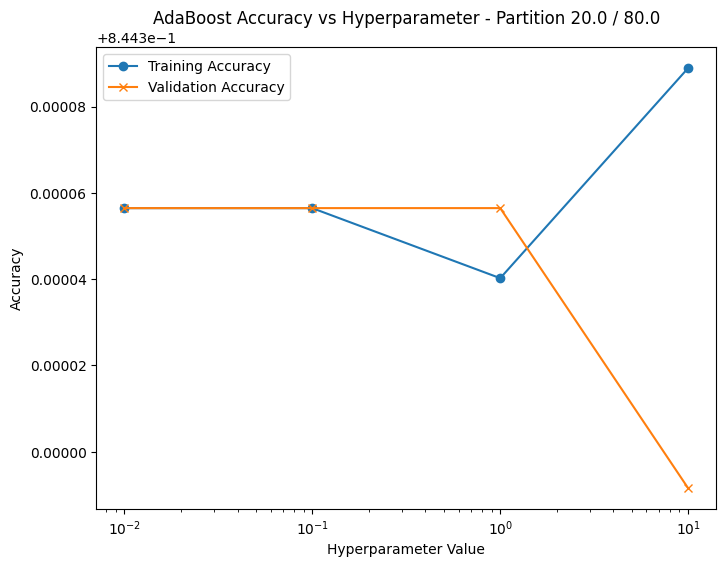


Trial 3
  Partition 80.0 / 20.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8418
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12971
         1.0       0.00      0.00      0.00      2437

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8418
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12971
         1.0       0.00      0.00      0.00      2437

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8418
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     12971
         1.0       0.00      0.00      0.00      2437

    accuracy                           0.84     15408
   macro avg       0.42      0.50      0.46     15408
weighted avg       0.71      0.84      0.77     15408



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

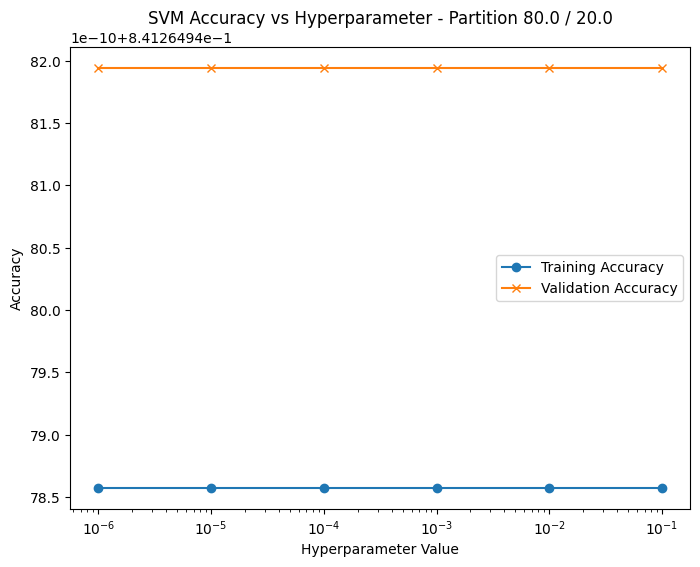

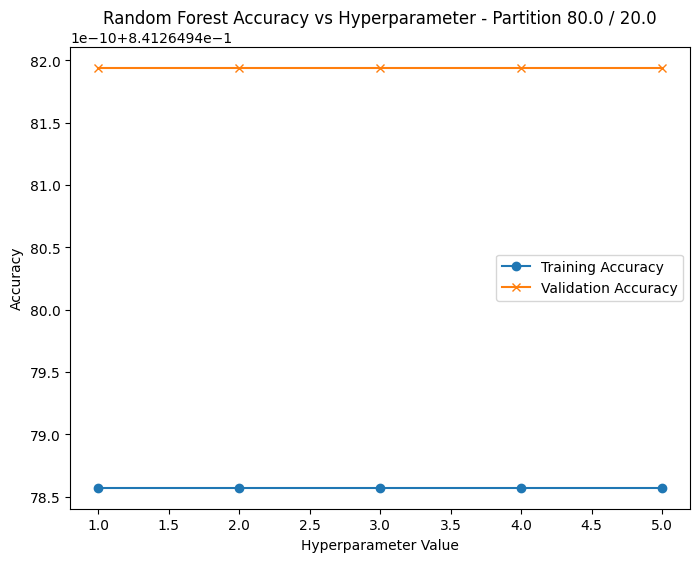

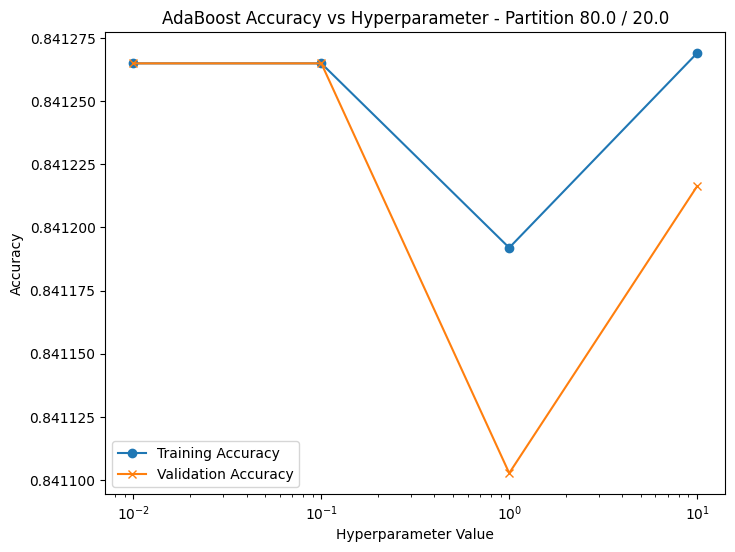

  Partition 50.0 / 50.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8396
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32343
         1.0       0.00      0.00      0.00      6177

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.70      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8396
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32343
         1.0       0.00      0.00      0.00      6177

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.70      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8396
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     32343
         1.0       0.00      0.00      0.00      6177

    accuracy                           0.84     38520
   macro avg       0.42      0.50      0.46     38520
weighted avg       0.70      0.84      0.77     38520



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

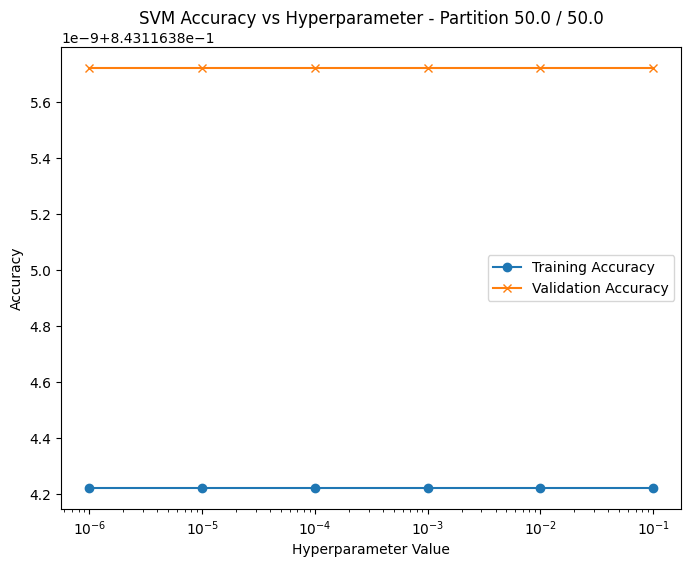

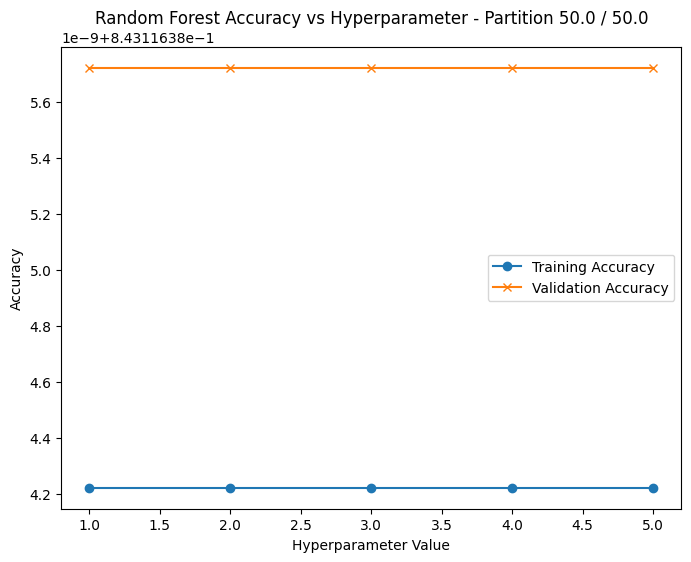

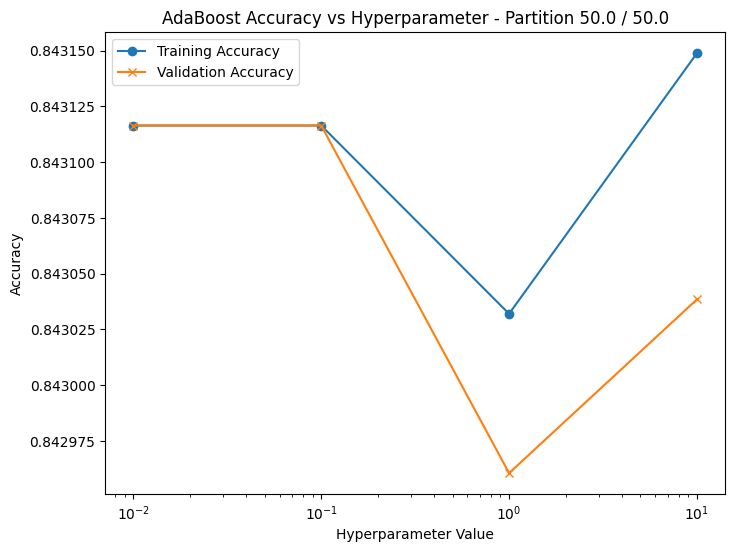

  Partition 20.0 / 80.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8405
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51803
         1.0       0.00      0.00      0.00      9829

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best RF Max Depth: 1
    RF Testing Accuracy: 0.8405
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51803
         1.0       0.00      0.00      0.00      9829

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8405
    AdaBoost:
              precision    recall  f1-score   support

        -1.0       0.84      1.00      0.91     51803
         1.0       0.00      0.00      0.00      9829

    accuracy                           0.84     61632
   macro avg       0.42      0.50      0.46     61632
weighted avg       0.71      0.84      0.77     61632



/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

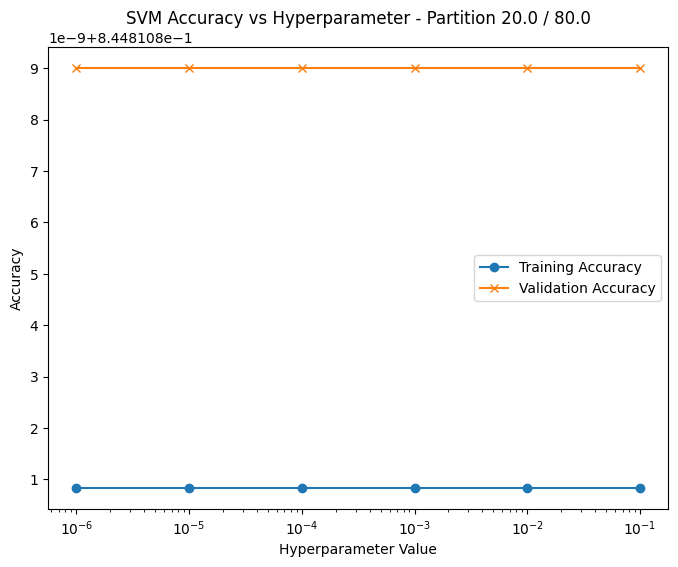

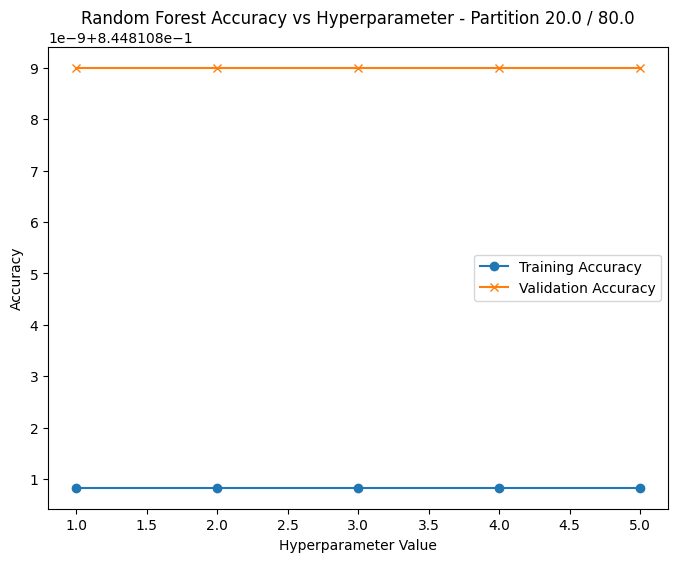

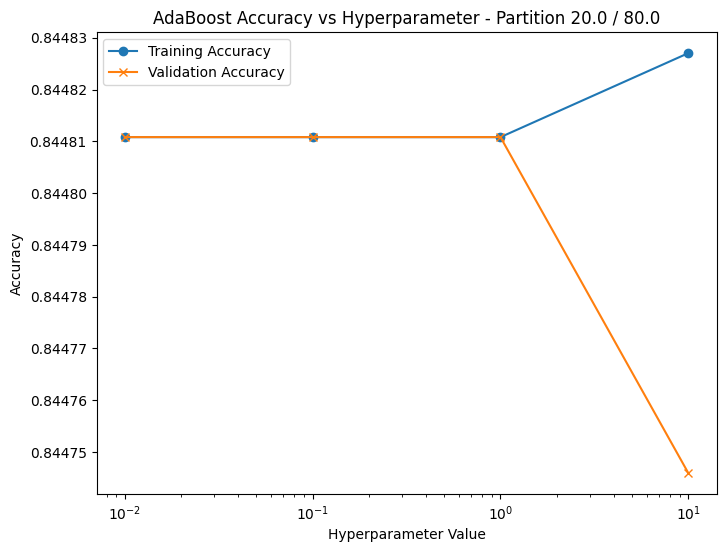

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Trials
for trial in range(3):  # 3 trials
    print(f"\nTrial {trial + 1}")

    X, y = shuffle(X_bank, y_bank, random_state=trial)

    partitions = [0.2, 0.5, 0.8]

    for i in range(3): 
        partition_size = partitions[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=partition_size, random_state=42)

        print(f"  Partition {100 - (partition_size * 100)} / {partition_size * 100}:")

        svm_train_accuracies = []
        svm_val_accuracies = []
        rf_train_accuracies = []
        rf_val_accuracies = []
        ab_train_accuracies = []
        ab_val_accuracies = []

        # hyperparameter tuning 
        for model_index in range(3):
            if model_index == 0:  # SVM
                classifier_svm = SVC(kernel='linear')
                C_list = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]

                # 5-fold cross validation with GridSearch instead of 10 (takes too long)
                grid_svm = GridSearchCV(classifier_svm, {'C': C_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_svm.fit(X_train, y_train)

                best_svm = grid_svm.best_estimator_

                svm_train_accuracies.append(grid_svm.cv_results_['mean_train_score'])
                svm_val_accuracies.append(grid_svm.cv_results_['mean_test_score'])

                pred_svm = best_svm.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_svm)
                print(f"    Best SVM C: {grid_svm.best_params_['C']}")
                print(f"    SVM Testing Accuracy: {test_accuracy:.4f}")
                print(f"    Support Vector Machine:\n{classification_report(y_test, pred_svm)}")

            elif model_index == 1:  # Random Forest
                classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
                max_depth_list = [1, 2, 3, 4, 5]

                grid_rf = GridSearchCV(classifier_rf, {'max_depth': max_depth_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_rf.fit(X_train, y_train)

                best_rf = grid_rf.best_estimator_

                rf_train_accuracies.append(grid_rf.cv_results_['mean_train_score'])
                rf_val_accuracies.append(grid_rf.cv_results_['mean_test_score'])

                pred_rf = best_rf.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_rf)
                print(f"    Best RF Max Depth: {grid_rf.best_params_['max_depth']}")
                print(f"    RF Testing Accuracy: {test_accuracy:.4f}")
                print(f"    Random Forest:\n{classification_report(y_test, pred_rf)}")

            elif model_index == 2:  # AdaBoost
                classifier_ab = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
                learning_rate_list = [0.01, 0.1, 1, 10]

                grid_ab = GridSearchCV(classifier_ab, {'learning_rate': learning_rate_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_ab.fit(X_train, y_train)

                best_ab = grid_ab.best_estimator_

                ab_train_accuracies.append(grid_ab.cv_results_['mean_train_score'])
                ab_val_accuracies.append(grid_ab.cv_results_['mean_test_score'])

                pred_ab = best_ab.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_ab)
                print(f"    Best AdaBoost learning rate: {grid_ab.best_params_['learning_rate']}")
                print(f"    AdaBoost Testing Accuracy: {test_accuracy:.4f}")
                print(f"    AdaBoost:\n{classification_report(y_test, pred_ab)}")

        models = ['SVM', 'Random Forest', 'AdaBoost']
        accuracies_train = [svm_train_accuracies, rf_train_accuracies, ab_train_accuracies]
        accuracies_val = [svm_val_accuracies, rf_val_accuracies, ab_val_accuracies]
        
        for model_idx, model_name in enumerate(models):
            plt.figure(figsize=(8, 6))

            # Select the appropriate hyperparameter list for the current model
            if model_name == 'SVM':
                x_values = C_list
            elif model_name == 'Random Forest':
                x_values = max_depth_list
            elif model_name == 'AdaBoost':
                x_values = learning_rate_list

            # Plot training and validation accuracies
            plt.plot(x_values, accuracies_train[model_idx][0], label="Training Accuracy", marker='o')
            plt.plot(x_values, accuracies_val[model_idx][0], label="Validation Accuracy", marker='x')
            
            if model_name in ['SVM', 'AdaBoost']:
                plt.xscale('log')
            
            plt.xlabel('Hyperparameter Value')
            plt.ylabel('Accuracy')
            plt.title(f'{model_name} Accuracy vs Hyperparameter - Partition {100 - (partition_size * 100)} / {partition_size * 100}')
            plt.legend()
            plt.show()


## Bank dataset testing (improved final version)


Trial 1
  Partition 80.0 / 20.0:
    Best SVM C: 1e-06
    SVM Testing Accuracy: 0.8455
Predictions class distribution:
-1.0    2000
Name: count, dtype: int64
    Support Vector Machine:
              precision    recall  f1-score   support

        -1.0       0.85      1.00      0.92      1691
         1.0       1.00      0.00      0.00       309

    accuracy                           0.85      2000
   macro avg       0.92      0.50      0.46      2000
weighted avg       0.87      0.85      0.77      2000

    Best RF Max Depth: 5
    RF Testing Accuracy: 0.6520
    Random Forest:
              precision    recall  f1-score   support

        -1.0       0.88      0.68      0.77      1691
         1.0       0.22      0.47      0.30       309

    accuracy                           0.65      2000
   macro avg       0.55      0.58      0.53      2000
weighted avg       0.77      0.65      0.70      2000

    Best AdaBoost learning rate: 0.01
    AdaBoost Testing Accuracy: 0.8455
    Ad

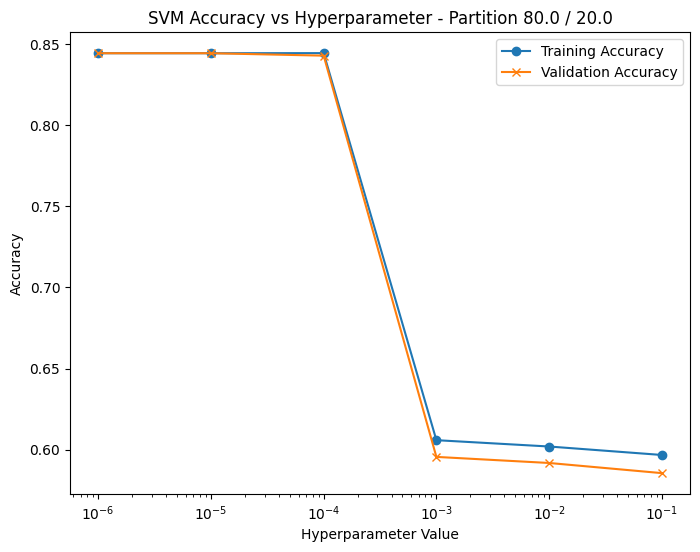

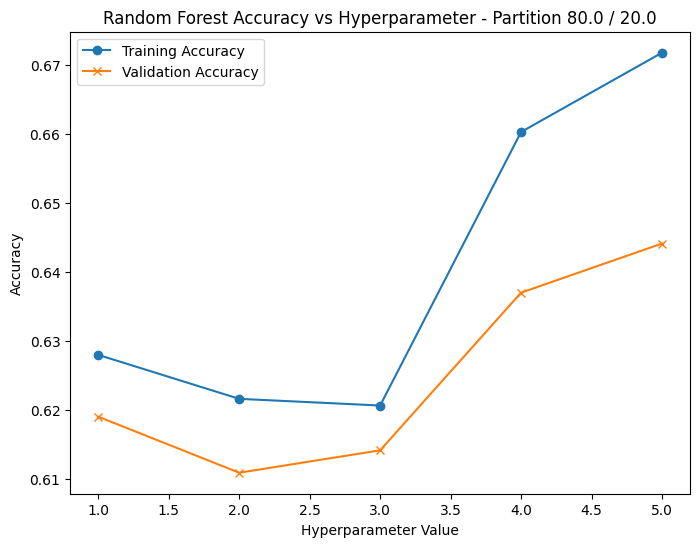

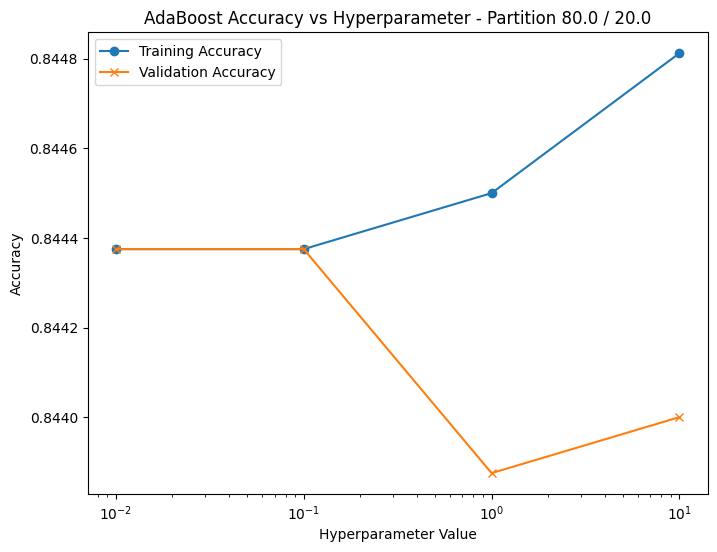

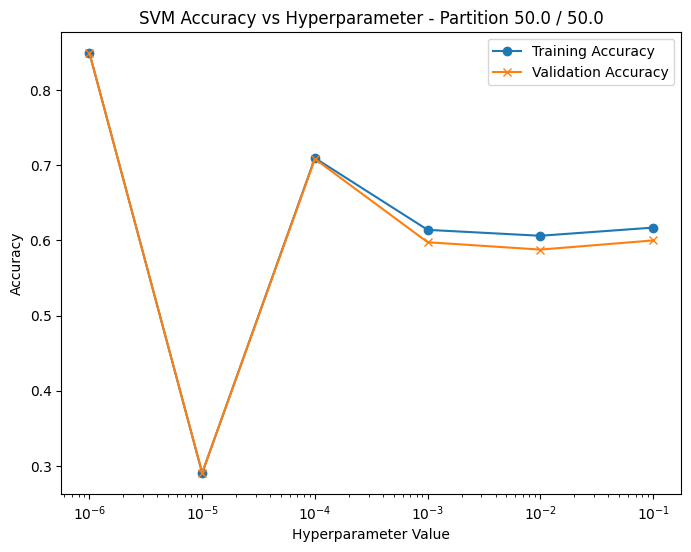

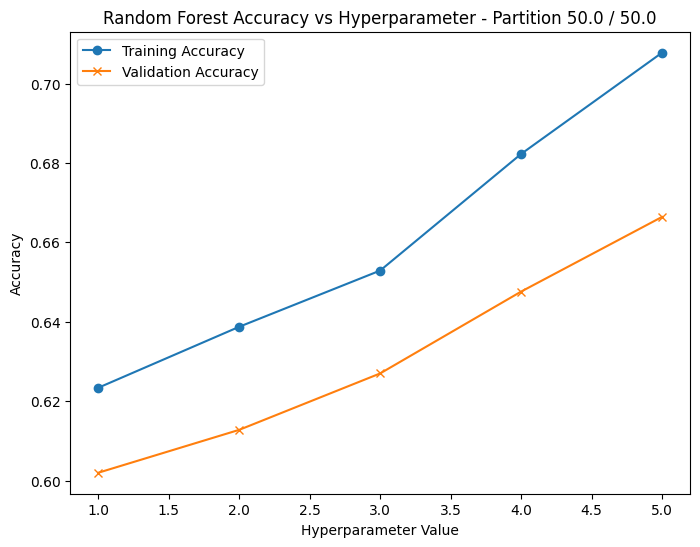

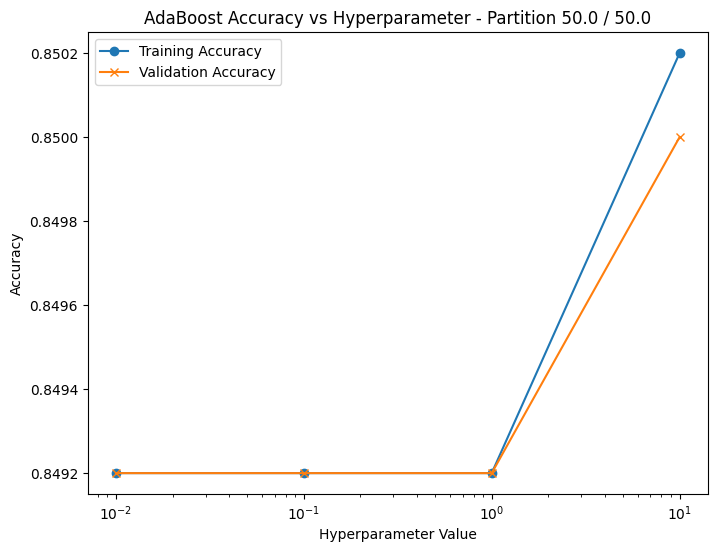

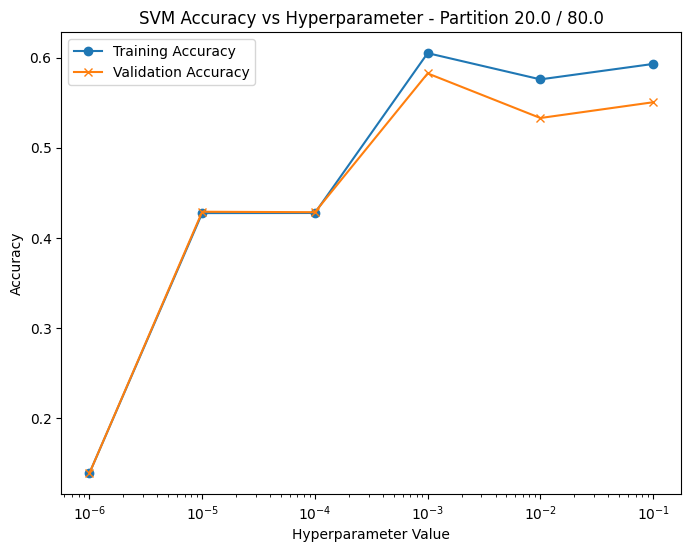

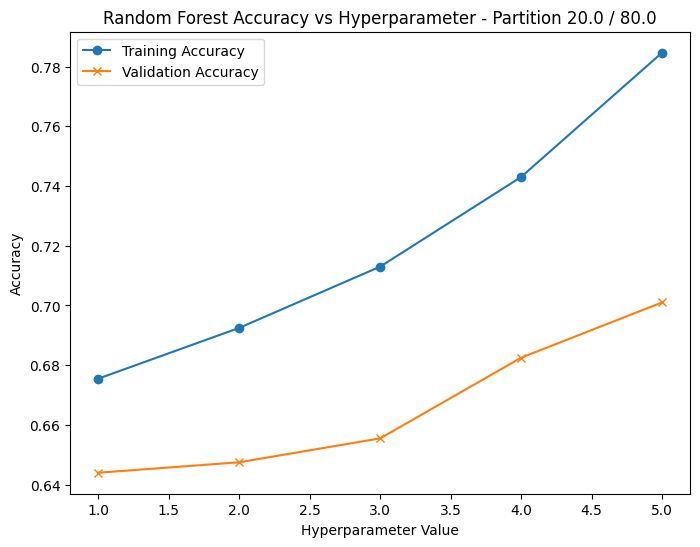

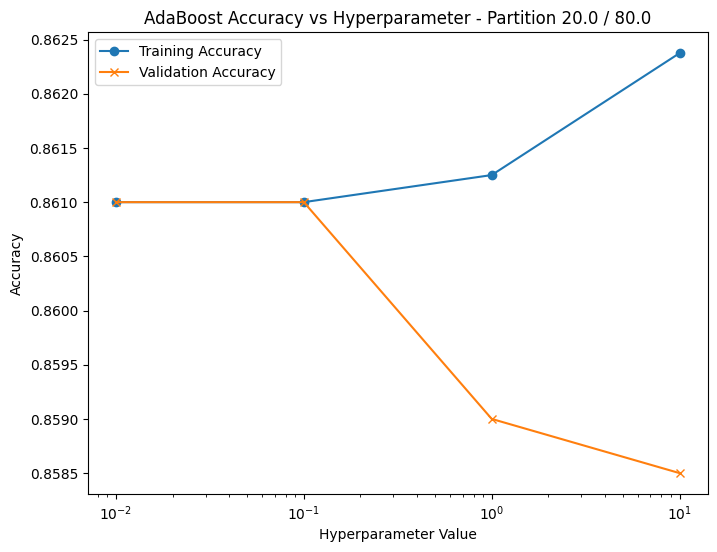

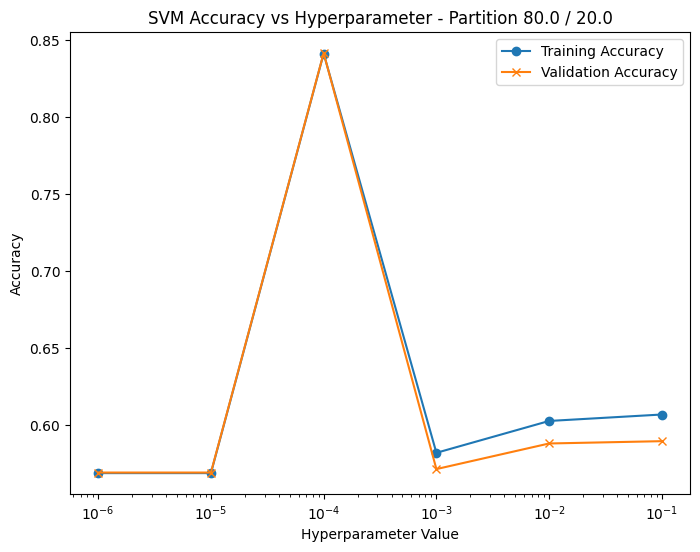

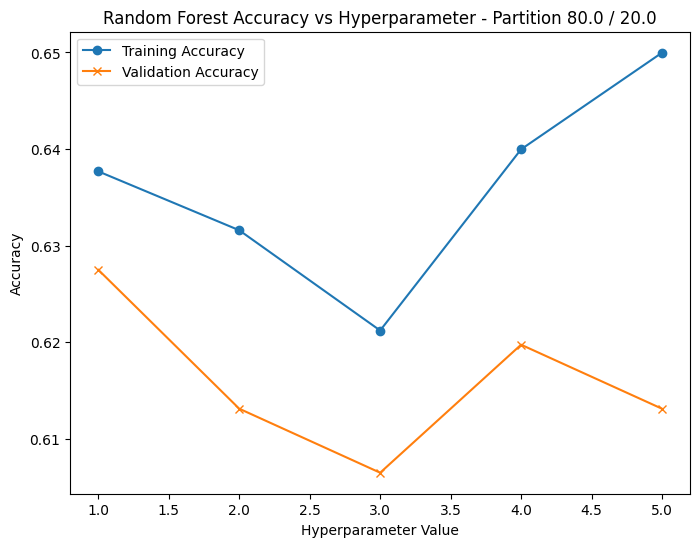

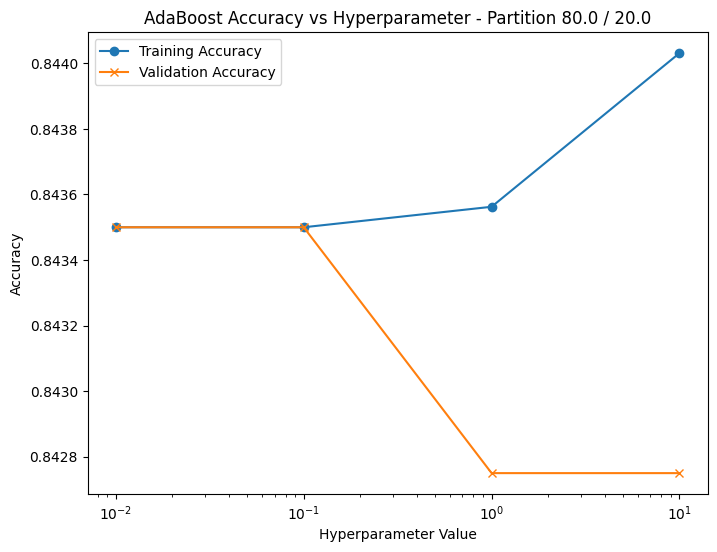

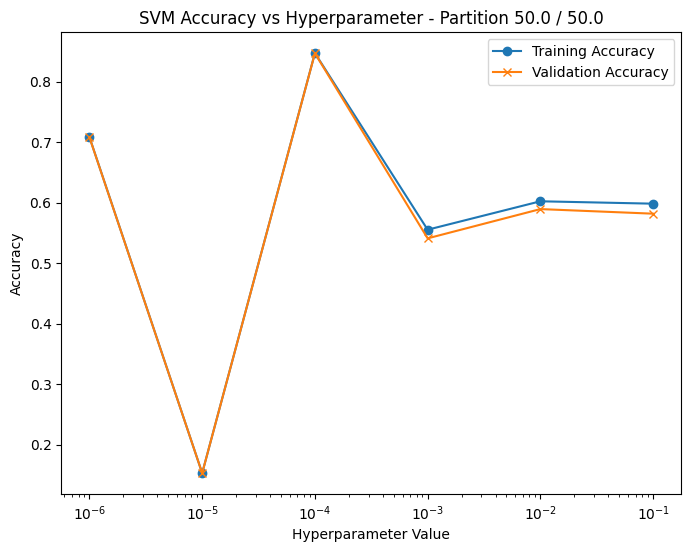

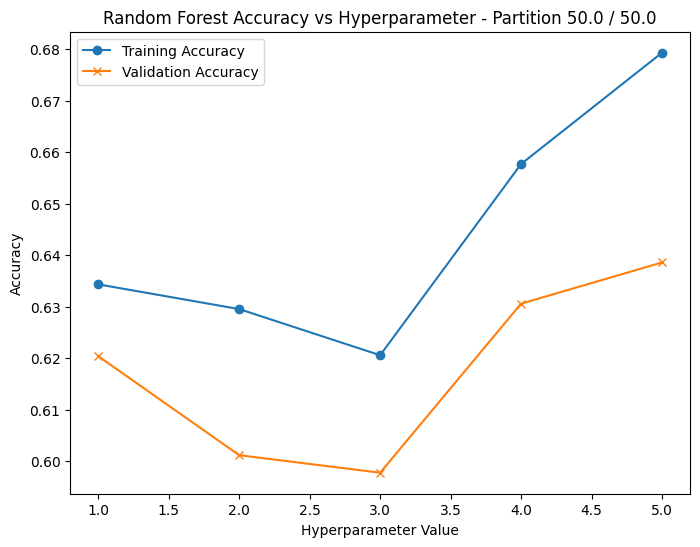

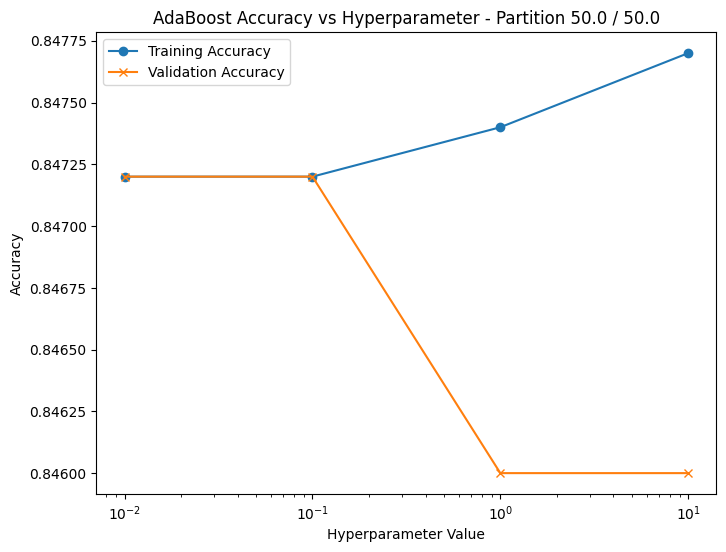

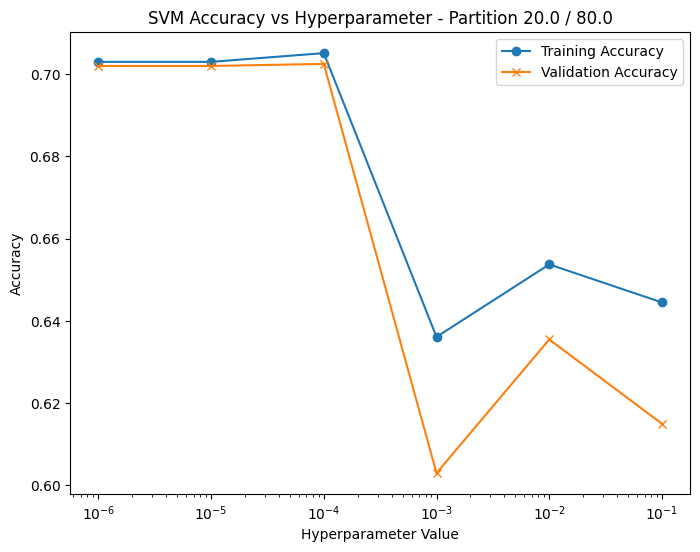

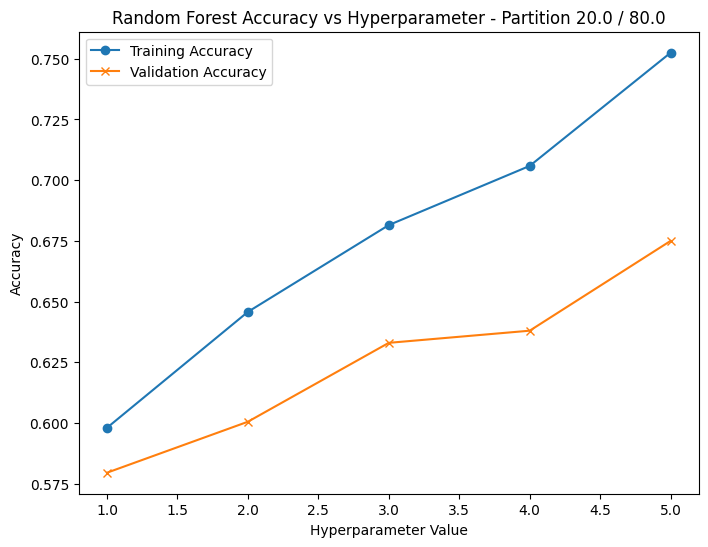

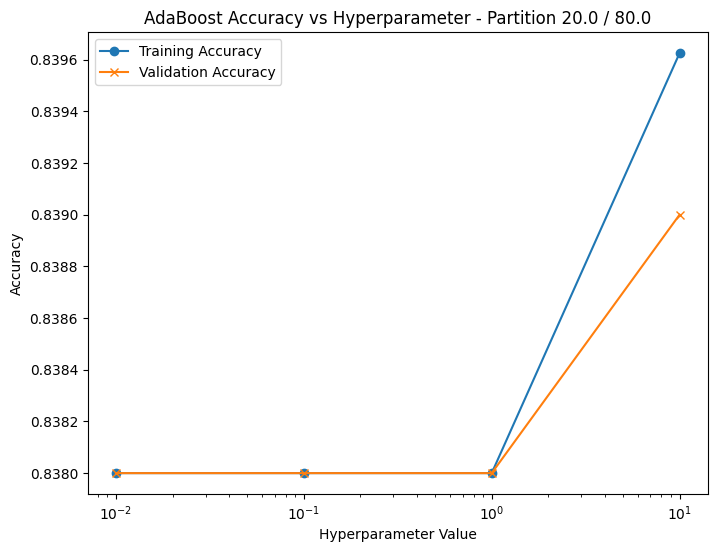

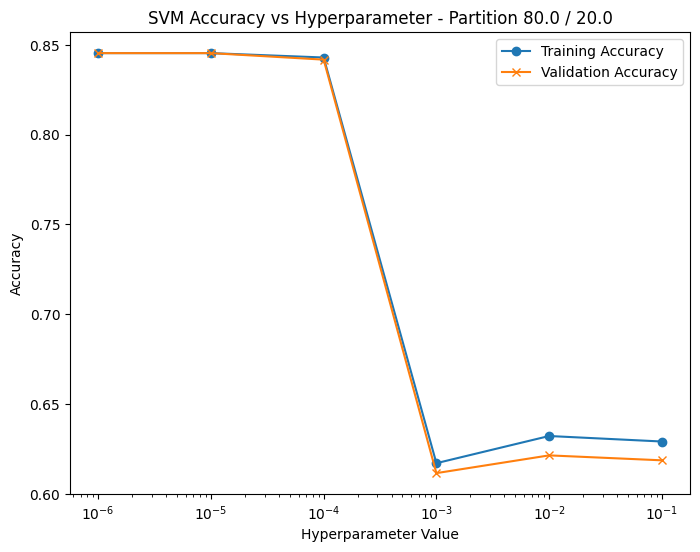

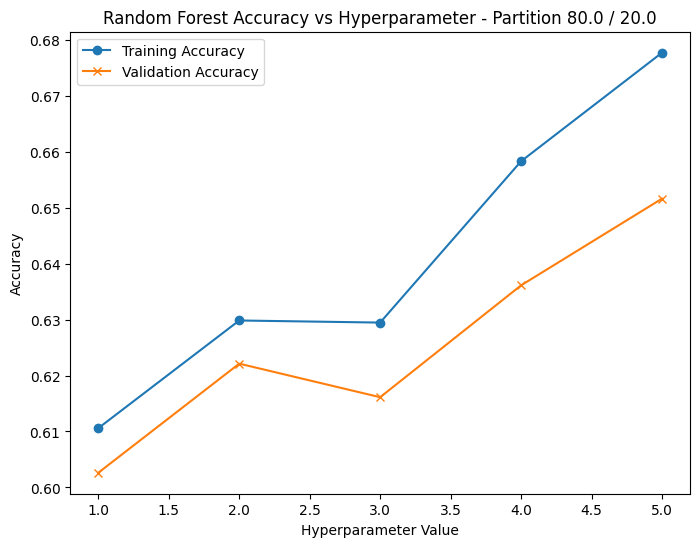

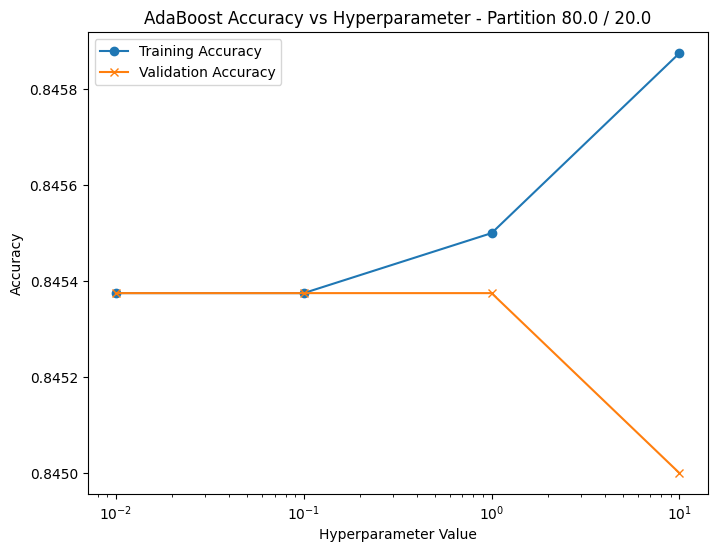

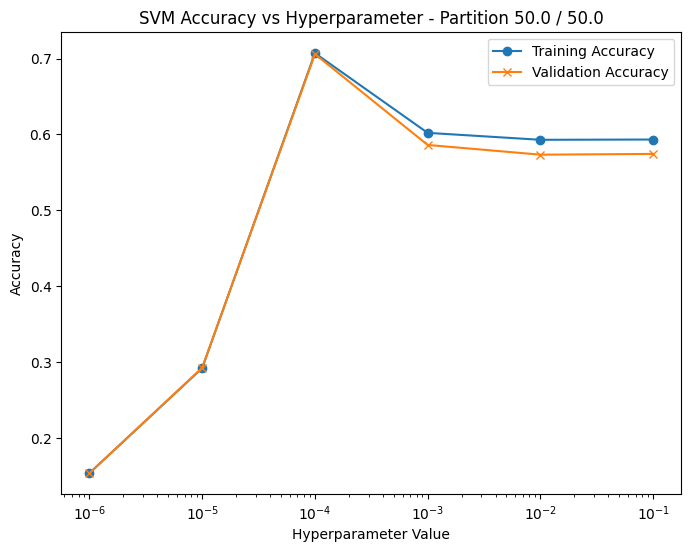

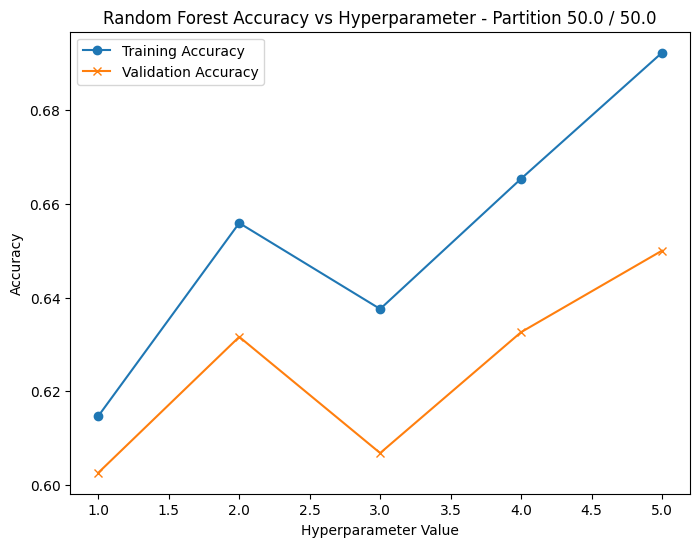

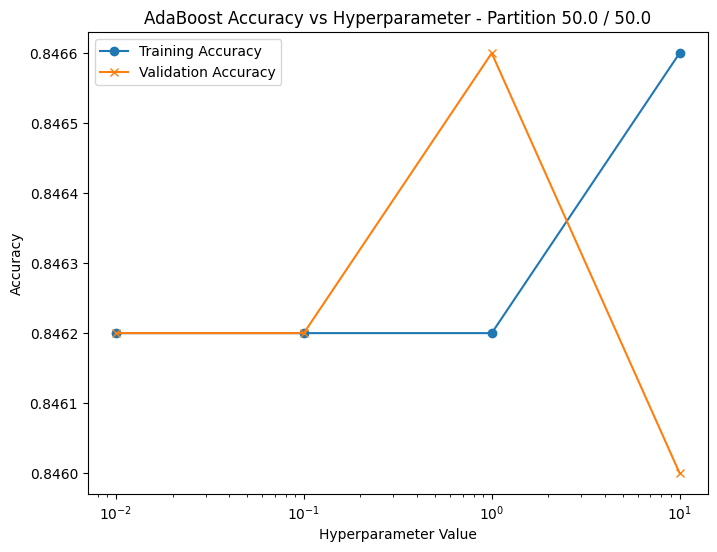

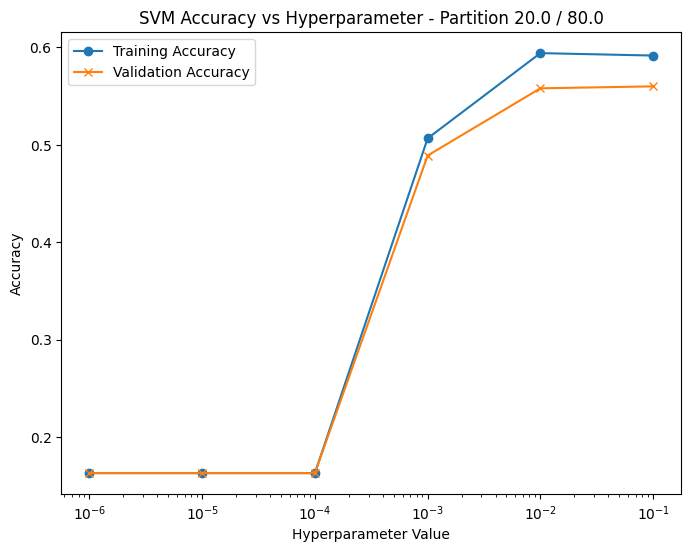

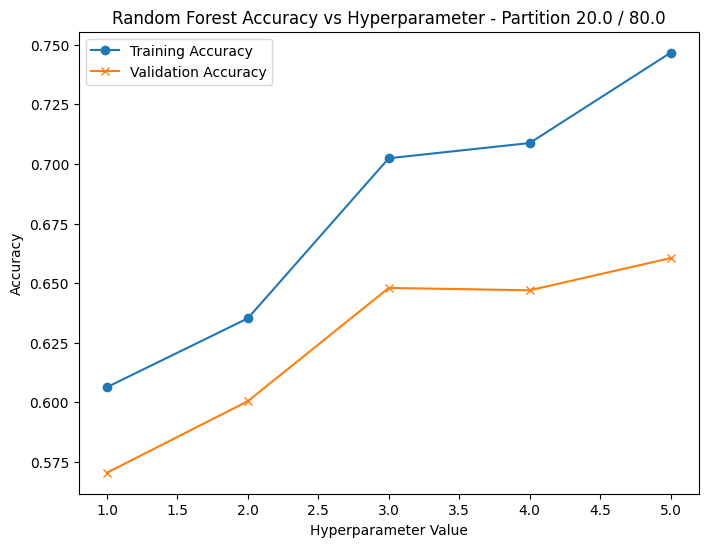

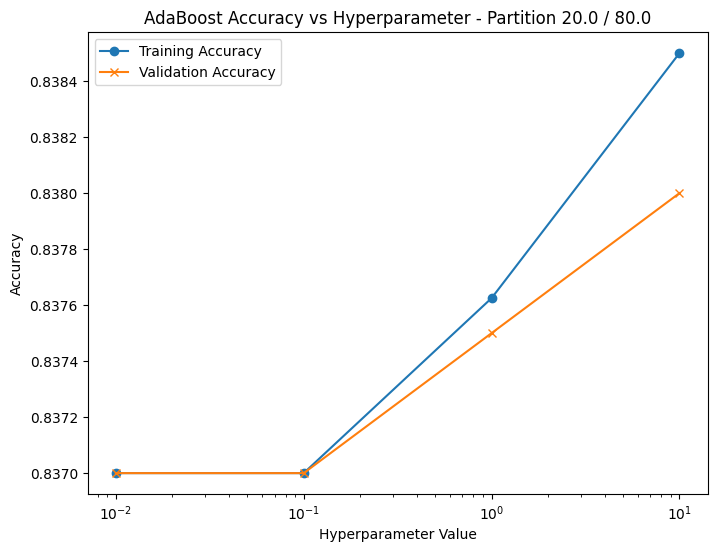

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

plot_data = []

# Trials
for trial in range(3): 
    print(f"\nTrial {trial + 1}")

    X, y = shuffle(X_bank, y_bank, random_state=trial)

    partitions = [0.2, 0.5, 0.8] 

    for i in range(3): 
        partition_size = partitions[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=partition_size, random_state=42)

        print(f"  Partition {100 - (partition_size * 100)} / {partition_size * 100}:")

        svm_train_accuracies = []
        svm_val_accuracies = []
        rf_train_accuracies = []
        rf_val_accuracies = []
        ab_train_accuracies = []
        ab_val_accuracies = []

        # Hyperparameter tuning 
        for model_index in range(3):
            if model_index == 0:  # SVM
                classifier_svm = SVC(kernel='linear', class_weight='balanced') 
                C_list = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]

                # 5-fold cross-validation with GridSearch instead of 10 (takes too long)
                grid_svm = GridSearchCV(classifier_svm, {'C': C_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_svm.fit(X_train, y_train)

                best_svm = grid_svm.best_estimator_

        
                svm_train_accuracies.append(grid_svm.cv_results_['mean_train_score'])
                svm_val_accuracies.append(grid_svm.cv_results_['mean_test_score'])

                pred_svm = best_svm.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_svm)
                print(f"    Best SVM C: {grid_svm.best_params_['C']}")
                print(f"    SVM Testing Accuracy: {test_accuracy:.4f}")

              
                print("Predictions class distribution:")
                print(pd.Series(pred_svm).value_counts())

           
                print(f"    Support Vector Machine:\n{classification_report(y_test, pred_svm, zero_division=1)}")

            elif model_index == 1:  # Random Forest
                classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced')  # Add class_weight
                max_depth_list = [1, 2, 3, 4, 5]

                grid_rf = GridSearchCV(classifier_rf, {'max_depth': max_depth_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_rf.fit(X_train, y_train)

                best_rf = grid_rf.best_estimator_

           
                rf_train_accuracies.append(grid_rf.cv_results_['mean_train_score'])
                rf_val_accuracies.append(grid_rf.cv_results_['mean_test_score'])

                pred_rf = best_rf.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_rf)
                print(f"    Best RF Max Depth: {grid_rf.best_params_['max_depth']}")
                print(f"    RF Testing Accuracy: {test_accuracy:.4f}")

                # Random Forest classification report with zero_division handling
                print(f"    Random Forest:\n{classification_report(y_test, pred_rf, zero_division=1)}")

            elif model_index == 2:  # AdaBoost
                classifier_ab = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', learning_rate=1, random_state=42)  # Default learning_rate
                learning_rate_list = [0.01, 0.1, 1, 10]

                grid_ab = GridSearchCV(classifier_ab, {'learning_rate': learning_rate_list}, scoring='accuracy', cv=5, return_train_score=True)
                grid_ab.fit(X_train, y_train)

                best_ab = grid_ab.best_estimator_


                ab_train_accuracies.append(grid_ab.cv_results_['mean_train_score'])
                ab_val_accuracies.append(grid_ab.cv_results_['mean_test_score'])

                pred_ab = best_ab.predict(X_test)
                test_accuracy = accuracy_score(y_test, pred_ab)
                print(f"    Best AdaBoost learning rate: {grid_ab.best_params_['learning_rate']}")
                print(f"    AdaBoost Testing Accuracy: {test_accuracy:.4f}")

                print(f"    AdaBoost:\n{classification_report(y_test, pred_ab, zero_division=1)}")

        models = ['SVM', 'Random Forest', 'AdaBoost']
        accuracies_train = [svm_train_accuracies, rf_train_accuracies, ab_train_accuracies]
        accuracies_val = [svm_val_accuracies, rf_val_accuracies, ab_val_accuracies]
        

        for model_idx, model_name in enumerate(models):
        
            if model_name == 'SVM':
                x_values = C_list
            elif model_name == 'Random Forest':
                x_values = max_depth_list
            elif model_name == 'AdaBoost':
                x_values = learning_rate_list

            plot_data.append((model_name, partition_size, accuracies_train[model_idx], accuracies_val[model_idx], x_values))

for model_name, partition_size, train_acc, val_acc, x_values in plot_data:
    plt.figure(figsize=(8, 6))

    # Plot training and validation accuracies
    plt.plot(x_values, train_acc[0], label="Training Accuracy", marker='o')
    plt.plot(x_values, val_acc[0], label="Validation Accuracy", marker='x')

    if model_name in ['SVM', 'AdaBoost']:
        plt.xscale('log')

    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy vs Hyperparameter - Partition {100 - (partition_size * 100)} / {partition_size * 100}')
    plt.legend()
    plt.show()
